# Coursework 3 Data Science

Preamble code.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
import operator

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F
import torchvision.transforms as TN
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
import networkx as nx
import seaborn as sns
import matplotlib.colors as mcolors
%matplotlib inline

from time import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score,fowlkes_mallows_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Cleaning and Loading the data

In [6]:
# mount my drive (faster than 'files')
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# change the directory to your Google Drive folder where you saved the MNIST files
feature_matrix = pd.read_csv("/content/drive/My Drive/Datascience/feature_matrix.csv",header=None,dtype=int )
adj_matrix = pd.read_csv("/content/drive/My Drive/Datascience/adjacency_matrix.csv", header=None ,dtype=int)

In [0]:
adj_matrix.head()

0     1     2     3     4     5     ...  2479  2480  2481  2482  2483  2484
0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1   0.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
2   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
3   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
4   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0

[5 rows x 2485 columns]

#Task 1: Unsupervised learning of text document association

##1.1 Clustering of feature matrix

### Meaning of CH score

What the CH score in sklearn is actually calculating is very ambigous because of conflicting documentation, but at first glance it appear a higher score is better, with a higher score giving essentially more distinct clusters (in truth it means a higher ratio of average distance of centroids within a cluster to the distance of other centroids). The CH score value is only relevent to clustersing of the same data and number. But a smaller number of clusterings will generally result in better CH score. The reason prehaps why our optimum clusterings is the first with a CH score less then 7, is because this is the threshold for beyond which our clustering get worse. 

###Optimum CH score




The following code finds optimised clustering via the K-Means algorithum for different number of clustering, it does this multiple time to give insight into how the results vary. It also generates CH score for different initial conditions. 

In [0]:
#create list for an average CH score
CHscoreave=[]
CHscore2=[]
optclus=[]
for j in range(10):
  #create a temporary CH score list for each iteration of Kmeans
  CHscore=[]
  #create list of number of graph clusters for graph use
  ncluster=[]
  #dummy variable for to help find best score
  k=0
  #####iterate over number of clusters for k-means for values between [2,30] ######
  for i in range(2,30):
    #sety up Kmeans models
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    #fit it to feature matrix
    groups1=kmeans.fit(feature_matrix)
    #extract labels
    labels = groups1.labels_
    #calulate CH score
    CHscore.append(metrics.calinski_harabasz_score(feature_matrix,labels))
    #works out nclusters list
    ncluster.append(i)
    #prints which score is the first to be less then 7 for each iteration
    if CHscore[i-2]<7 and k==0:
      print('Optimum number of clusters =',i)
      k=k+1
      #sets optimul clustering
      kopt=kmeans
      #make list of optimal clustering
      optclus.append(i)
    if j==0:
      #####sets up Kmeans models for rand inital conditions ########
      kmeans2 = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10)
      #fit to feature matrix
      groups2=kmeans2.fit(feature_matrix)
      #extract labels
      labels2 = groups2.labels_
      #calulate CH score
      CHscore2.append(metrics.calinski_harabasz_score(feature_matrix,labels2))
  if j==0:    
    #for first iterastion
    CHscoreave=CHscore
  else:
    CHscoreave=np.add(CHscore,CHscoreave)
#works out the CH average
CHscoreave=np.divide(CHscoreave,j+1)
  


Optimum number of clusters = 23
Optimum number of clusters = 28
Optimum number of clusters = 21
Optimum number of clusters = 25
Optimum number of clusters = 16
Optimum number of clusters = 24
Optimum number of clusters = 21
Optimum number of clusters = 24
Optimum number of clusters = 23
Optimum number of clusters = 22


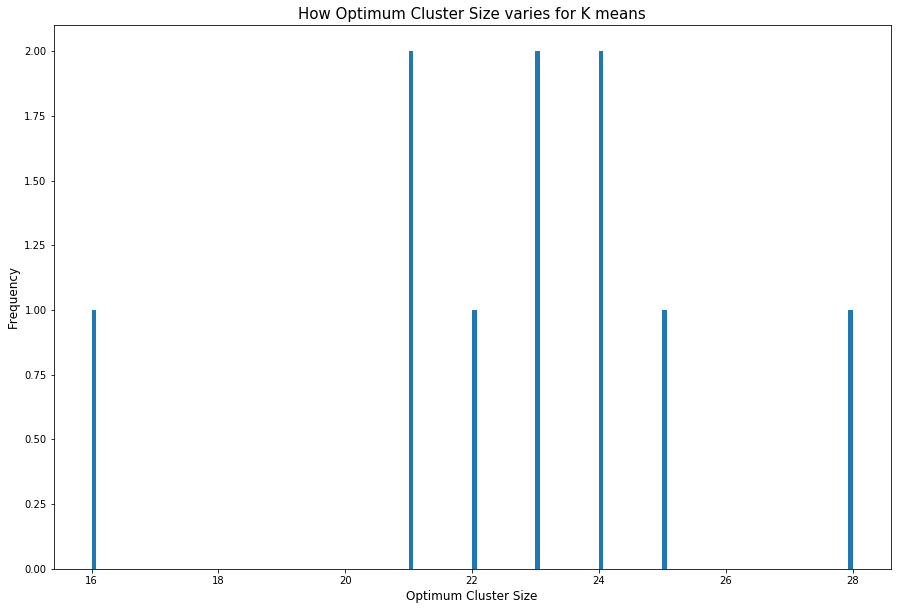

In [3]:
optclus=[23,28,21,25,16,24,21,24,23,22]
#code to produce histogram
plt.figure(figsize=(15, 10))
plt.hist(optclus,168)
plt.xlabel('Optimum Cluster Size',size=12)
plt.ylabel('Frequency',size=12)
plt.title('How Optimum Cluster Size varies for K means',size=15)
plt.show()

We be ideal to have entries for Histogram, however it was too computationally expensive to do more.

As we can see the the optimum value seems to vary a lot especiall when we look at the graph. This is probably down to the inherent randomness Kmeans algorithm, with the clustering depending on the inital conditions. I have set the intial conditions to 'k-means++' as this places centroids far apart and generally leads to better results, in this case it doesn't seem to effect the  results so I have ommited them. The code below plots a scatter graph of CH score.

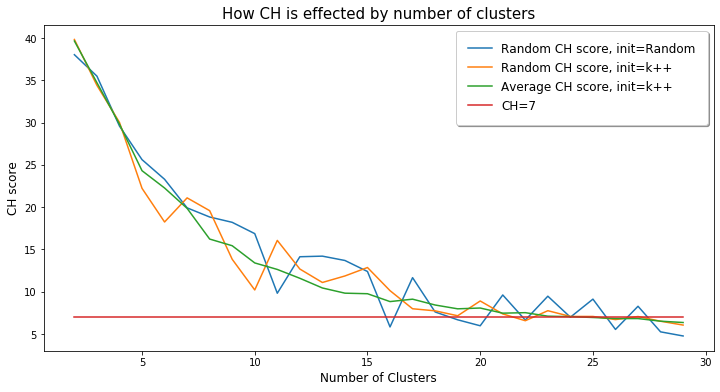

In [0]:
#plots a scatter graph
plt.figure(figsize=(12, 6))
plt.plot(ncluster,CHscore2,label="Random CH score, init=Random")
plt.plot(ncluster,CHscore,label="Random CH score, init=k++")
plt.plot(ncluster,CHscoreave,label="Average CH score, init=k++")
plt.plot(ncluster,(CHscoreave*0+7),label="CH=7")
#labels axis
plt.xlabel('Number of Clusters',size=12)
plt.ylabel('CH score',size=12)
#gives title
plt.title('How CH is effected by number of clusters',size=15)
#gives legend
plt.legend(loc="upper right",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()


As we can see CH score does vary a lot, so it is probably not very robust. We can see than changing the initial conditions gives similar results but for 'random' there is far more varation of results for a larger number of clusters. This is due to init='K++' giving better convergence of results, which is more apparent for a larger number of clusters.

### Characteritics of Optimal clustering and relevant statisics

The following code prints the cluster sizes of the optimum clustering.

In [0]:
#extracts clustering of optimumal clusterung
kopt_labels = kopt.labels_
#gives size of the clusterings
labels, counts = np.unique(kopt_labels[kopt_labels>=0], return_counts=True)
print( counts)

[  1 839   2   2   1   2   1   3   2   3   1 709   3 301   1   1 171   1
   2   2 326 111]


As we can see the many of the clusters just consist of few points which is not ideal. This is a result of the Kmeans algorithm being very sensitive to outliers. This also explains why there so much variation in the first CH score being under 7. Let us look at some more relevant statistics to confirm this including the inertia and Siloutte score. The following code generates the inertia and kmeans scores.

In [0]:
#sets up lists for all relevent calcs for changing cluster number
CHscore=[]
inertia=[]
ncluster=[]
k=0
for i in range(2,30):
  #sety up Kmeans models
   kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
   #fit it to feature matrix
   groups1=kmeans.fit(feature_matrix)
   #extract labels
   labels = groups1.labels_
   #calulate CH score
   CHscore.append(metrics.calinski_harabasz_score(feature_matrix,labels))
   #caluculates inertia of each cluster
   inertia.append(groups1.inertia_)
   #keeps track of number of clusters used for grpah use
   ncluster.append(i)
   #prints which score is the first to be less then 7 for each iteration
   if CHscore[i-2]<7 and k==0:
     print('Optimum number of clusters =',i)
     k=k+1
     #sets optimul clustering
     kopt=groups1

Optimum number of clusters = 26


This code generates the graph.

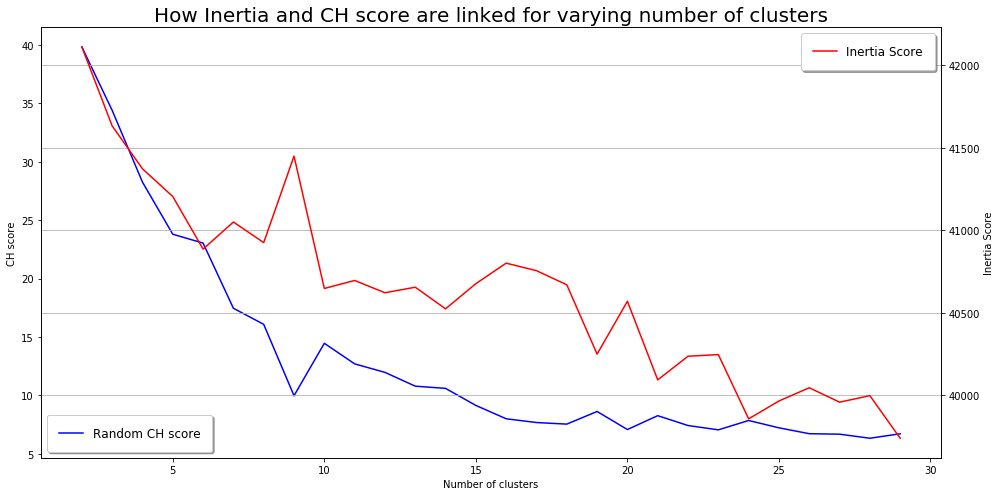

In [0]:
#sets up graph
fig, ax1 = plt.subplots(figsize =(14,7))

#plots CH score and first axis
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('CH score')
ax1.plot(ncluster,CHscore,label="Random CH score",color='b')
ax1.tick_params(axis='y')

#plots inertia and 2nd axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Inertia Score')  # we already handled the x-label with ax1
ax2.plot(ncluster,inertia,label="Inertia Score",color='r')
ax2.tick_params(axis='y')

#plots tiitle and legend and tidys up layout
plt.title('How Inertia and CH score are linked for varying number of clusters',fontsize=20)
ax1.legend(loc="lower left", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc="upper right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.grid(b=None) 
plt.show()

As we can see the inertia score is correlated to the CH score which is understandable as inertia is just the within cluster sum of squares, which the CH score is a ratio of. The inertia is what the K-means optimises over and it not having a clear stucture, suggests that k-means is performing poorly. The Code below generates the siloutte scores and graphs. 

For n_clusters = 3 The average silhouette_score is : 0.01566648417552787
For n_clusters = 10 The average silhouette_score is : -0.013127183527177204
For n_clusters = 18 The average silhouette_score is : -0.011120209787668417
For n_clusters = 26 The average silhouette_score is : -0.021557181707073745


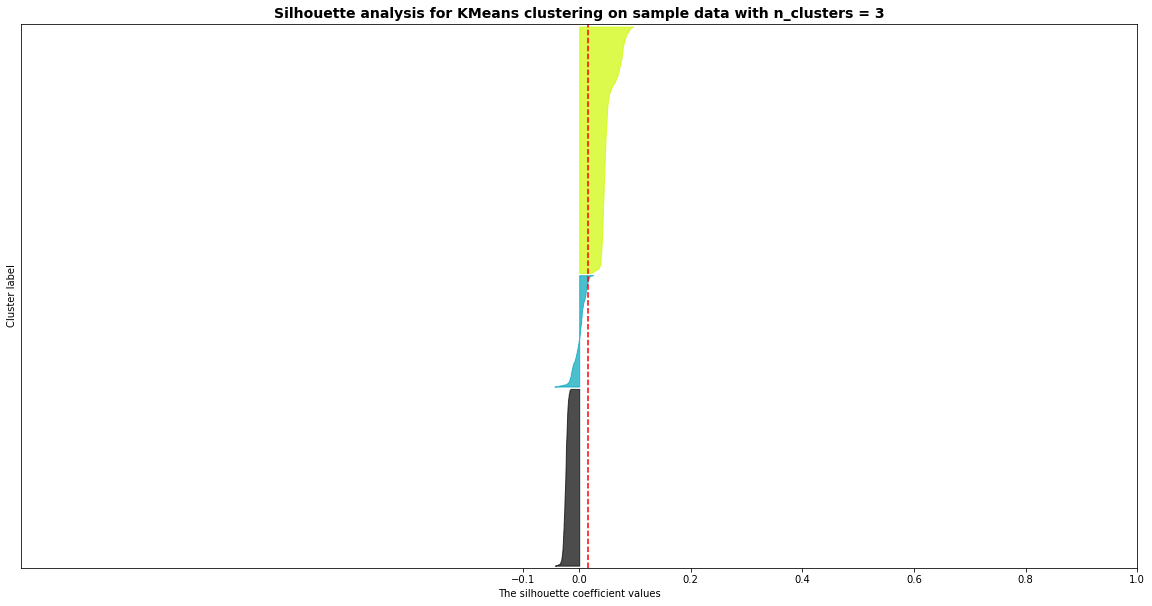

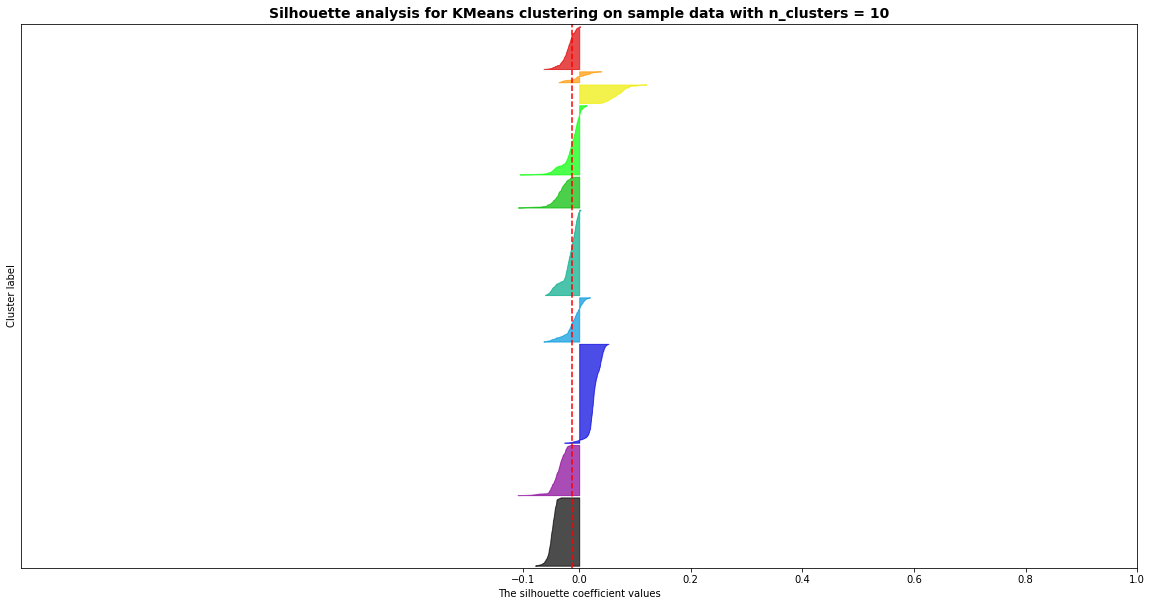

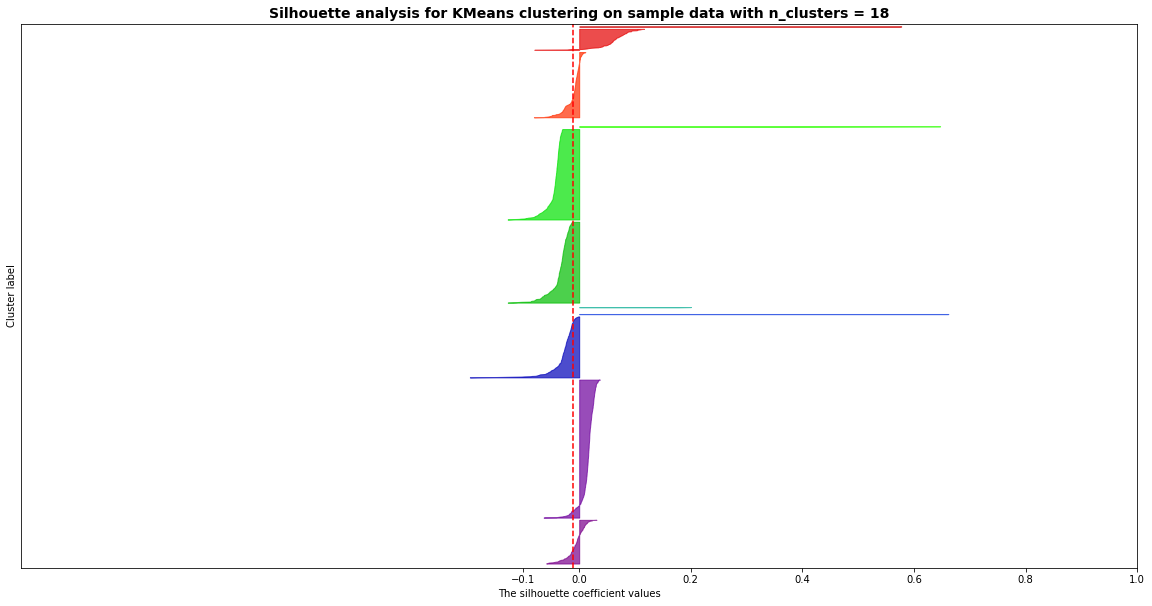

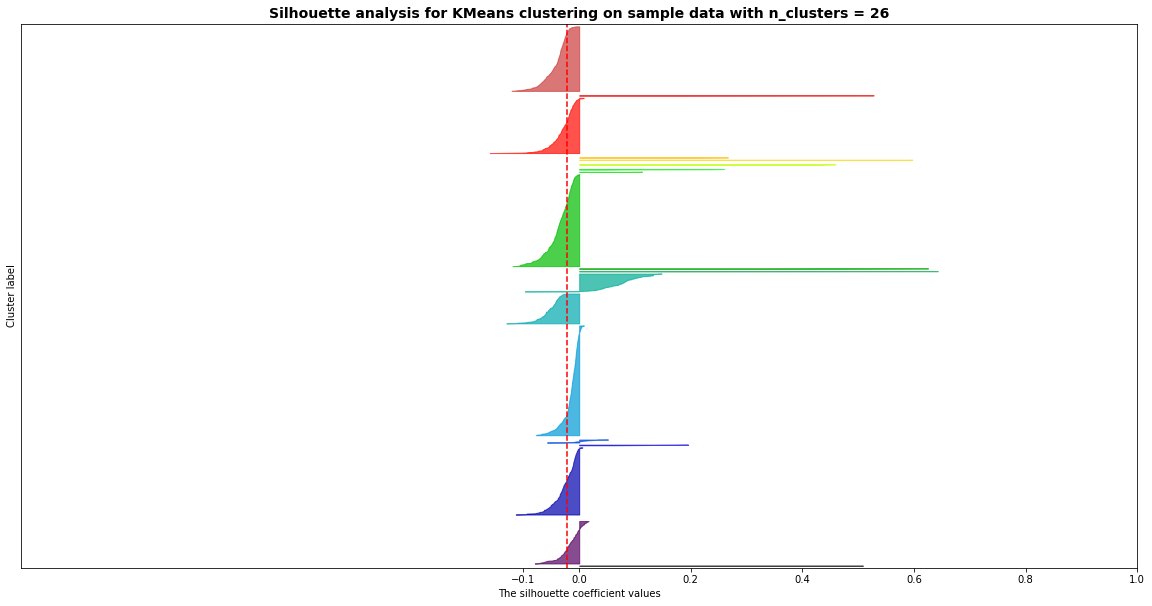

In [0]:
#number of cluster to test siloutte score of.
range_n_clusters = [3, 10,18,26]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(20, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(feature_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10)
    cluster_labels = clusterer.fit_predict(feature_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(feature_matrix, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(feature_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

This Siloutte graphs are very useful, the red line dotted line represents average score, for example the score being generally negative means the clusters are not well defined and potentiall miss labeled. The fact that most scores are near zero suggests that pretty much all clusters are overlapping as well. We don't really get a clear improvement when we increase the number cluster, with clusters getting more imbalanced in terms of size represented when graph is thin e.g yellow and light green of number of clusters=26 graph.

### Robustness of K-means

The K-means algorithm gives very inconsistent results. With the result heavily relying on initial conditions and the resulting clusters being very imbalanced with often 3 clusters dominating. This is down to the K-means algortihm not being very good for higher dimensioanl data as well as being sensitive to outliers. It is also is being optimised with respect to inertia which is probably not appropriate for this problem as it is quite complex.

## 1.2 Citation Graph

The following code prodes a basic citation graph for the adjacency matrix A. As we can see it is a very large dataset.

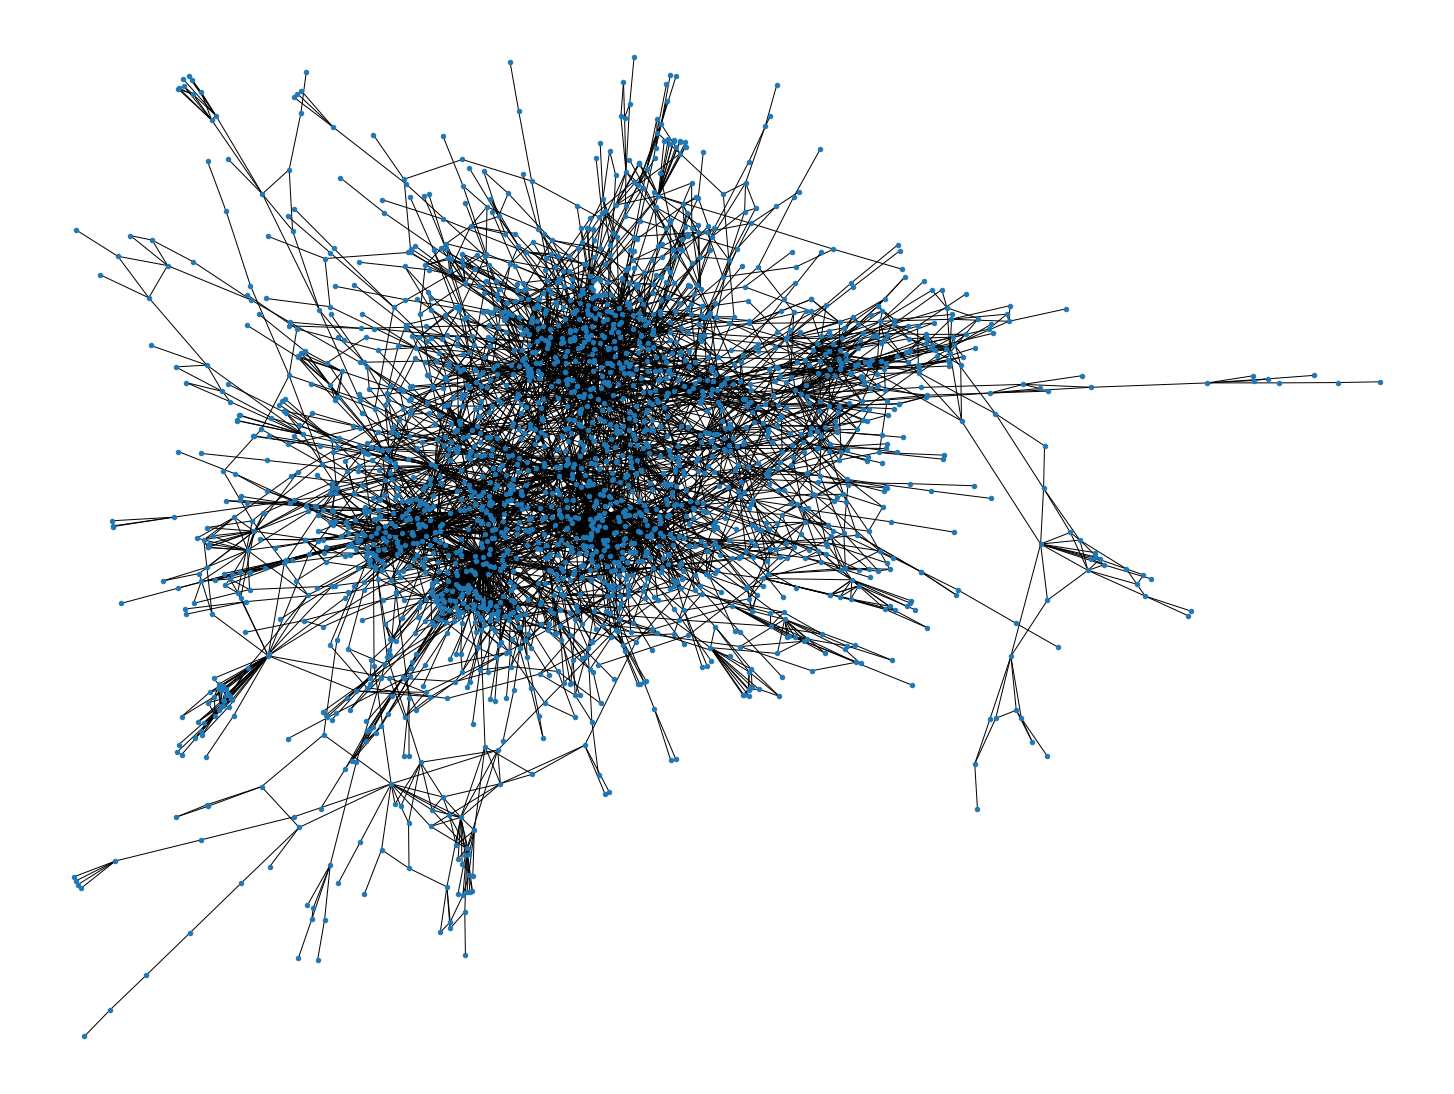

In [13]:
#coverts into correct format so netwrokx can understand it
G = nx.from_numpy_matrix(adj_matrix.to_numpy())
#sets the position of the nodes for furture use
pos = nx.spring_layout(G)
#draws the graph with node size 20
plt.figure(figsize=(20, 15))
nx.draw(G,node_size=20)
plt.show()

### Histogram of degrees

The following code genertaes the degree data.

In [0]:
#sets up numpy form adjancey matrix
rr=adj_matrix.to_numpy()
#obtains matrix full of degrees
degree=np.sum(rr,axis=1)
#works out max degree
maxdegree=np.max(degree)

The following code plots histogram.

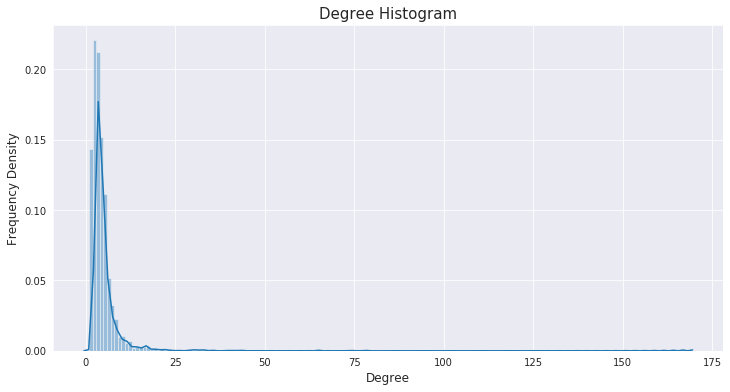

In [0]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.distplot(degree,168)
plt.xlabel('Degree',size=12)
plt.ylabel('Frequency Density',size=12)
plt.title('Degree Histogram',size=15)
plt.show()

Ineterestingly this looks as if data is roughly modeling a skewed normal distubuction. This code produces a histogram with a limited X-axis giving us abetter idea of the spread of data for higher degrees.

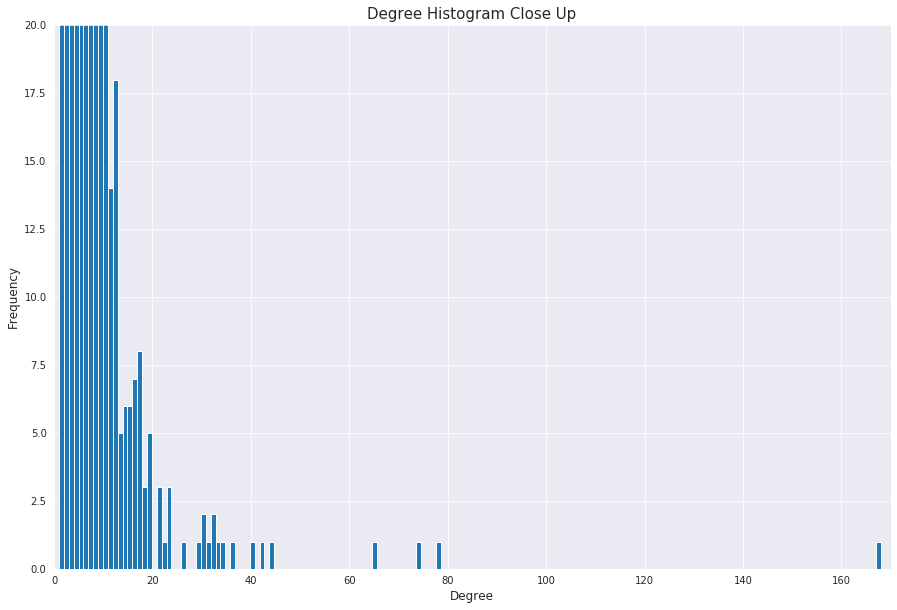

In [0]:
plt.figure(figsize=(15, 10))
plt.ylim(0,20)
plt.xlim(-.1,170)
plt.hist(degree,168)
plt.xlabel('Degree',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Degree Histogram Close Up',size=15)
plt.show()

The data is not very well spread out, with there being one node with value 168 a few with a degree between 40-80 and most having degree less then 20. The node which has degree 168 probably represents an important scientific which lots paper are based off of. 

### Centrality measures

The following code defines a function which produces a nice citation graph for a given centality measure and graph.

In [0]:
#input is graph G, pos=position of nodes, measure name and size of nodes
def c_measure(G, pos, measures, measure_name,node_size1):
    plt.figure(figsize=(20, 15))
    
    #sets the nodes of graph
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size1,alpha=1, cmap=plt.cm.cool,
    node_color=list(measures.values()),nodelist=list(measures.keys()),linewidths=0.005)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    #sets labels of graph
    # labels = nx.draw_networkx_labels(G, pos)
    
    #sets edges of the graph
    edges = nx.draw_networkx_edges(G, pos,width=0.1)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

This code generates degree data where certain values have been ommitted e.g degrees under 20, so it is easier to visualise the citation graphs.

In [0]:
#dummy degree list
degree1=np.zeros(len(degree))

#sets up other adjancey matrices with data to be dropped
adj_matrix2=adj_matrix.copy()
adj_matrix3=adj_matrix.copy()

#number for iterating over
kk=len(degree)

#itrates over degree array
for i in range(kk):
  if degree[kk-i-1]>5:
    degree1[i]=degree[i]
    if degree[kk-i-1]>20:
      adj_matrix3.drop(adj_matrix2.columns[[kk-i-1]],axis=1,inplace = True)
      adj_matrix3.drop(adj_matrix2.index[kk-i-1],inplace = True)
  else:
    adj_matrix2.drop(adj_matrix2.columns[[kk-i-1]],axis=1,inplace = True)
    adj_matrix2.drop(adj_matrix2.index[kk-i-1],inplace = True)

#graphs to be with number of elements reduced for clarity 
G2 = nx.from_numpy_matrix(adj_matrix2.to_numpy())
G3 = nx.from_numpy_matrix(adj_matrix3.to_numpy())



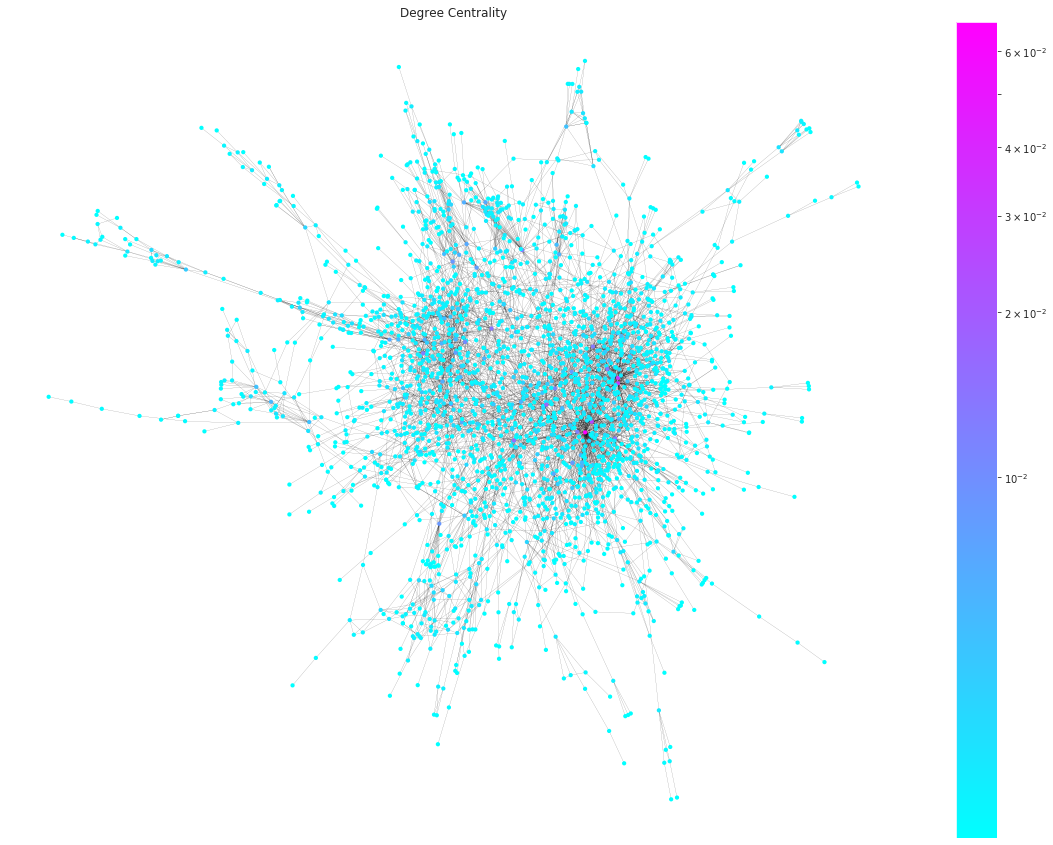

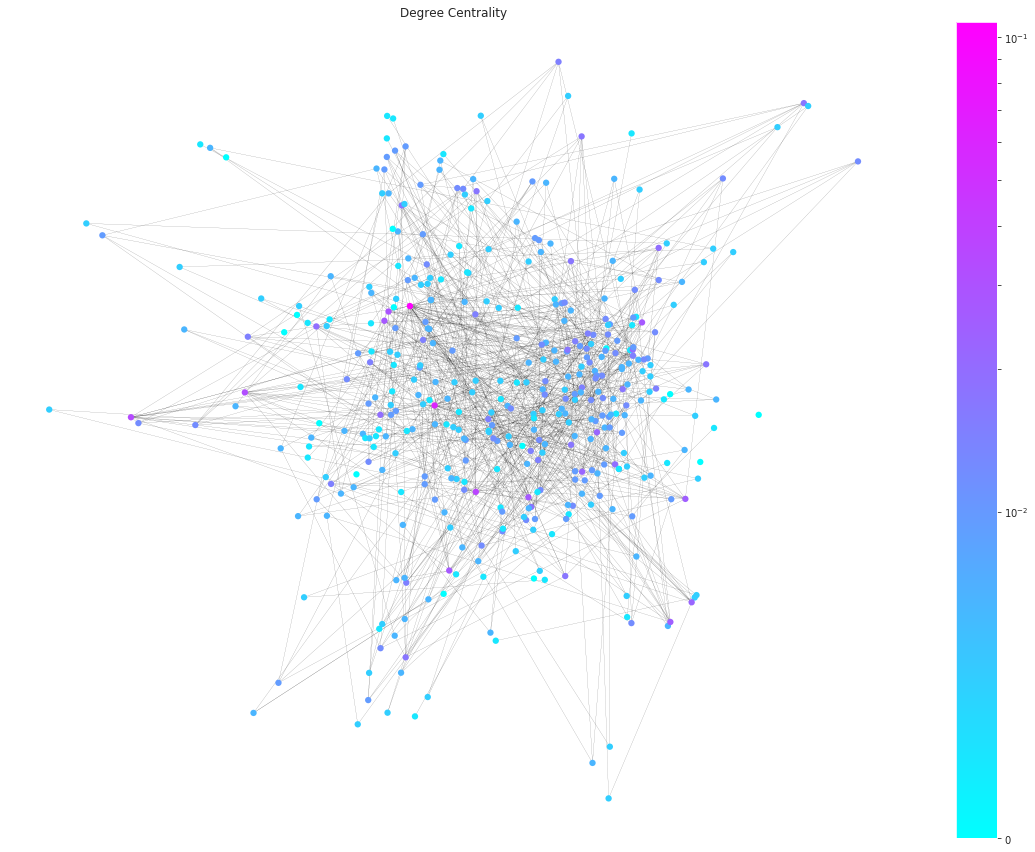

In [0]:
c_measure(G, pos, nx.degree_centrality(G), 'Degree Centrality',18)
c_measure(G2, pos, nx.degree_centrality(G2), 'Degree Centrality',40)

As we can see very few nodes actually have a high degree, which is reenforced when you look at histograms. Again the node of 168 degree stands out. and the nodes which are purplish (about 40 of them) probably represent import paper which are cited often.

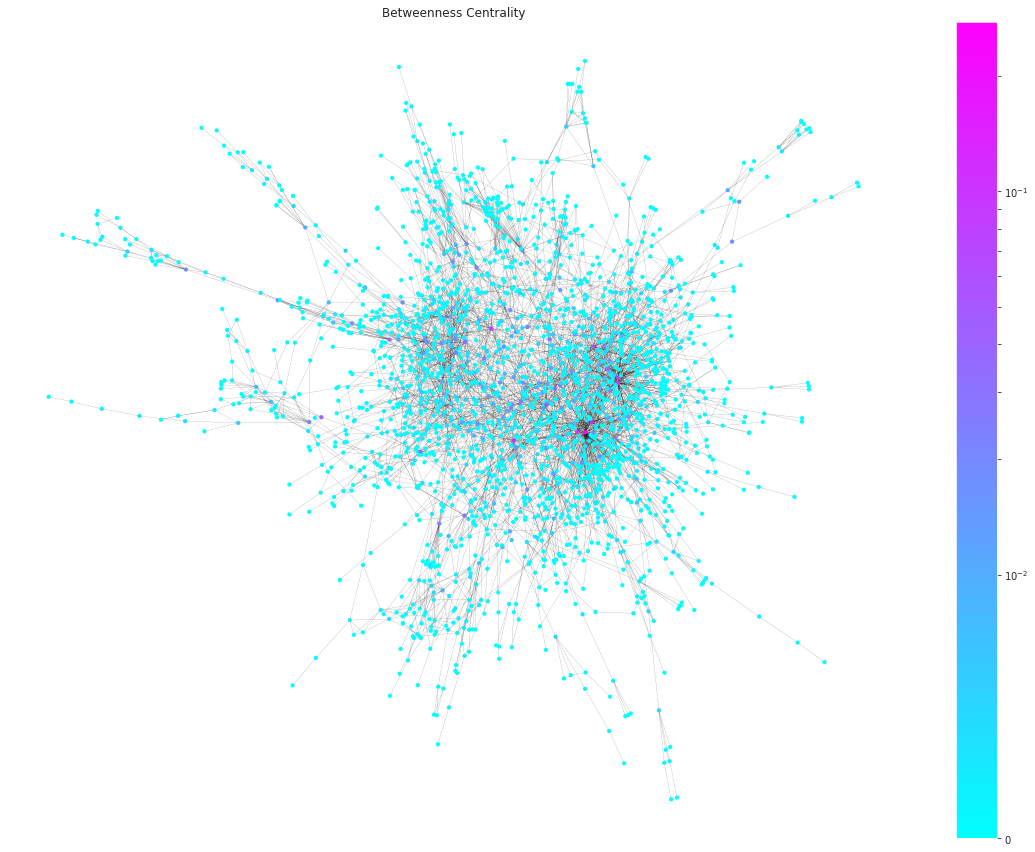

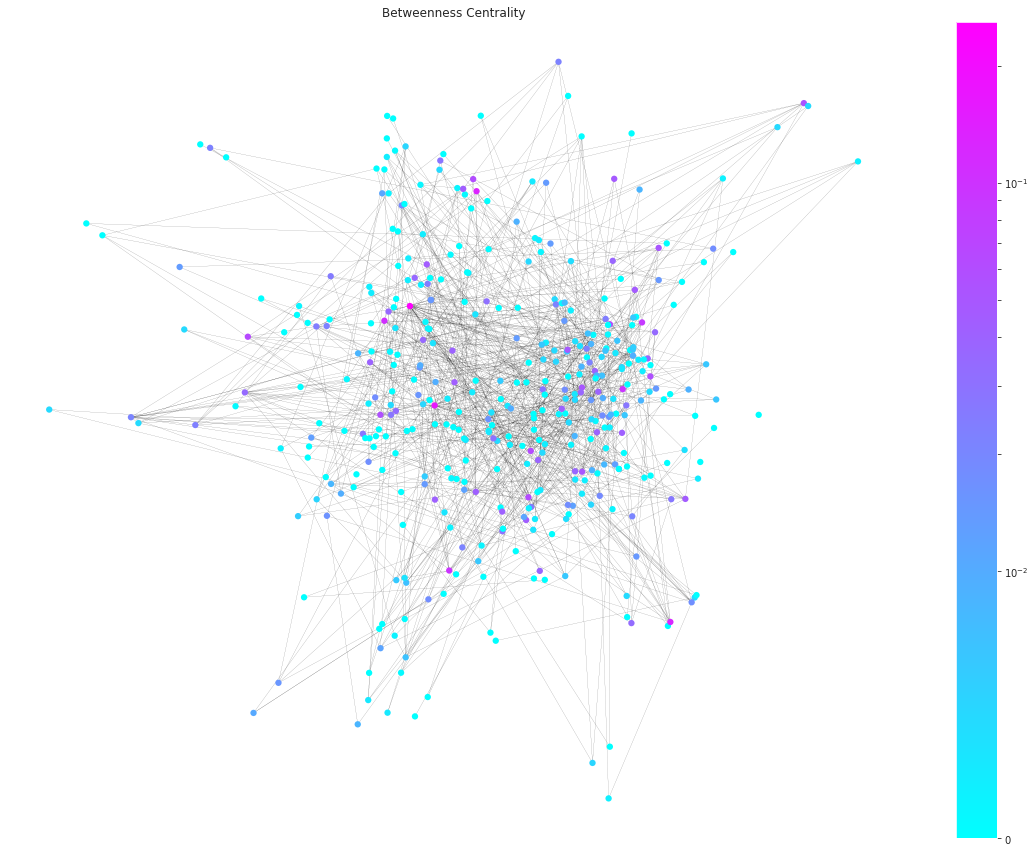

In [0]:
c_measure(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality',18)
c_measure(G2, pos, nx.betweenness_centrality(G2), 'Betweenness Centrality',40)

These graphs are far more interesting as it effectly shows how important a node is, prehaps in this case a dark purple colour representing a particularly important paper in a certain fields in a particular area. More nodes have higher values in this case shown by the far more frequent purple color appearing.

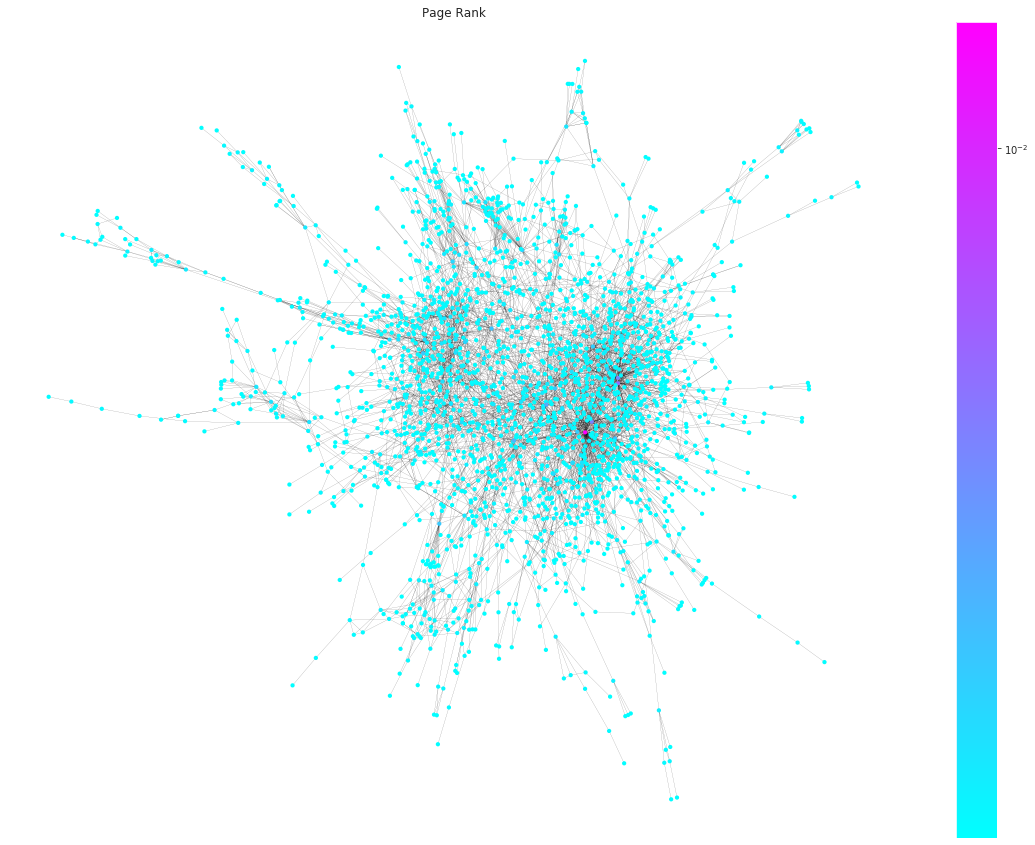

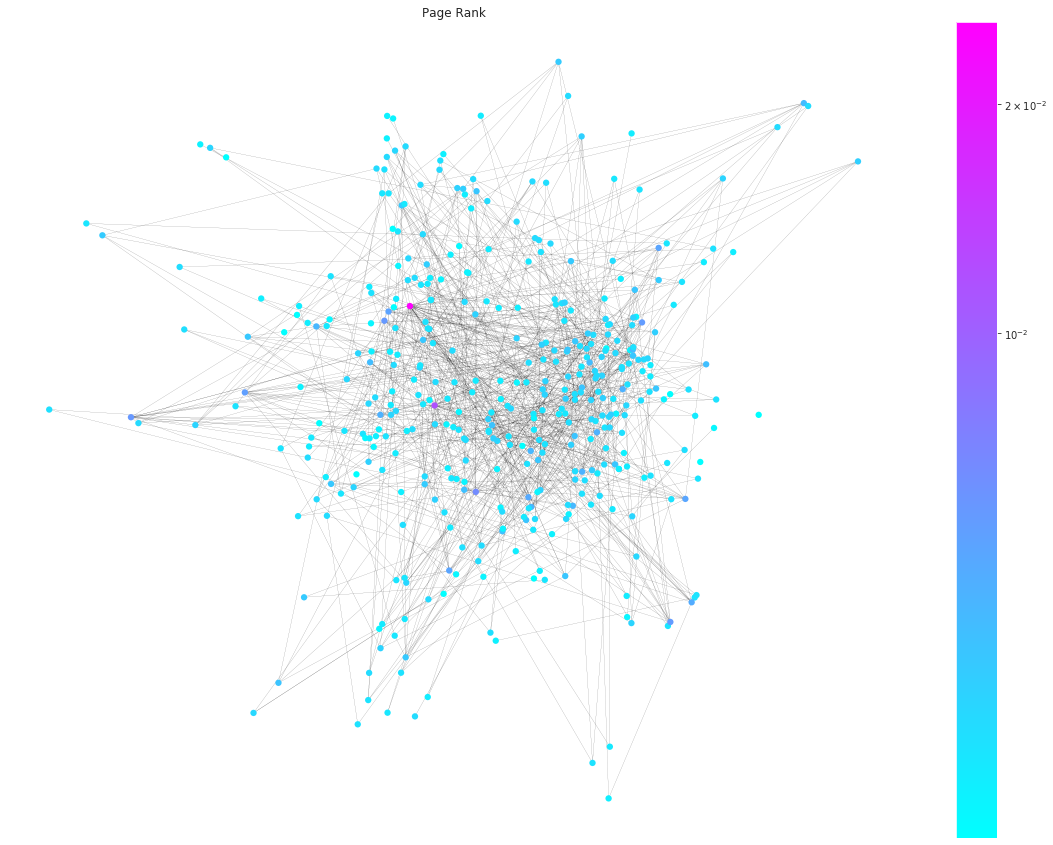

In [0]:
c_measure(G, pos, nx.pagerank(G), 'Page Rank',18)
c_measure(G2, pos, nx.pagerank(G2), 'Page Rank',40)

One node in particluar is very central (the one represented by a degree of 168). Otherwise it is quite hard to see which nodes have high values, again not very many nodes seem very central. But we get very similar results to the degree centrality, with it being a watered down version Which is expected due to Pagerank increaseing the value of nodes if the nodes it is connected to are important. 

### Correlation and Explanation of Centality measures

The code below produces the graphs to see the correlations. The code drops the nodes with the 20 highest degrees, so the plots are not skewed. So we can actually observe what the bulk of the data is actually doing. 

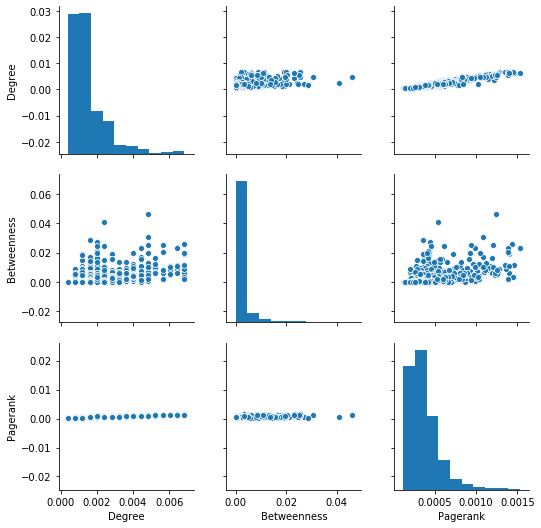

In [68]:
#works out valuse for all centrality measures
w1=nx.degree_centrality(G)
w2=nx.betweenness_centrality(G)
w3=nx.pagerank(G)
#creates dataframe of all the data
data1 = pd.DataFrame(list(zip(w1.values(),w2.values(),w3.values())), 
               columns =['Degree', 'Betweenness','Pagerank'])
#gets rid of top 20 degree results
for i in range(20):
  data1=data1.loc[data1['Degree']!=data1['Degree'].max()]
sns.pairplot(data1);

As we can see Pagerank and Degree are highly correlated, which is expected as Pagerank is based of degrees of nodes and how important the nodes the nodes they are connected to, hence giving a more extreme degree centrality. 

There is a very strong correlation between betweenness centrality and either page rank. Which makes sense as it highlights how many nodes have a shortest path going through a given node. So obviously it generally has higher values for high degree, but then disgusihes more between particular nodes of low degree.

## 1.3 Community Detection on Citation graph


### Clauset-Newman-Moore greedy modularity maximisation 

The following code find the optimal number of communities for Clauset-Newman-Moore greedy modularity maximisation algorithm

In [14]:
#find optimum communities
c=nx.algorithms.community.greedy_modularity_communities(G)
#print number of communities
print('k*=',len(c))

k*= 29


The following code creates a list with values corresponding to what communtiy a node is in (assigns 0-28 intergers) and creates list of top 30 according to degree.

In [0]:
#comm list is what community they are
comm=np.zeros(len(degree))
#iterates of c to exctract from model c above
for i in range(len(c)):
  for j in c[i]:
    #assigns communiy value
    comm[j]=i


The following code plots 29 communities onto a graph giving them different colours.

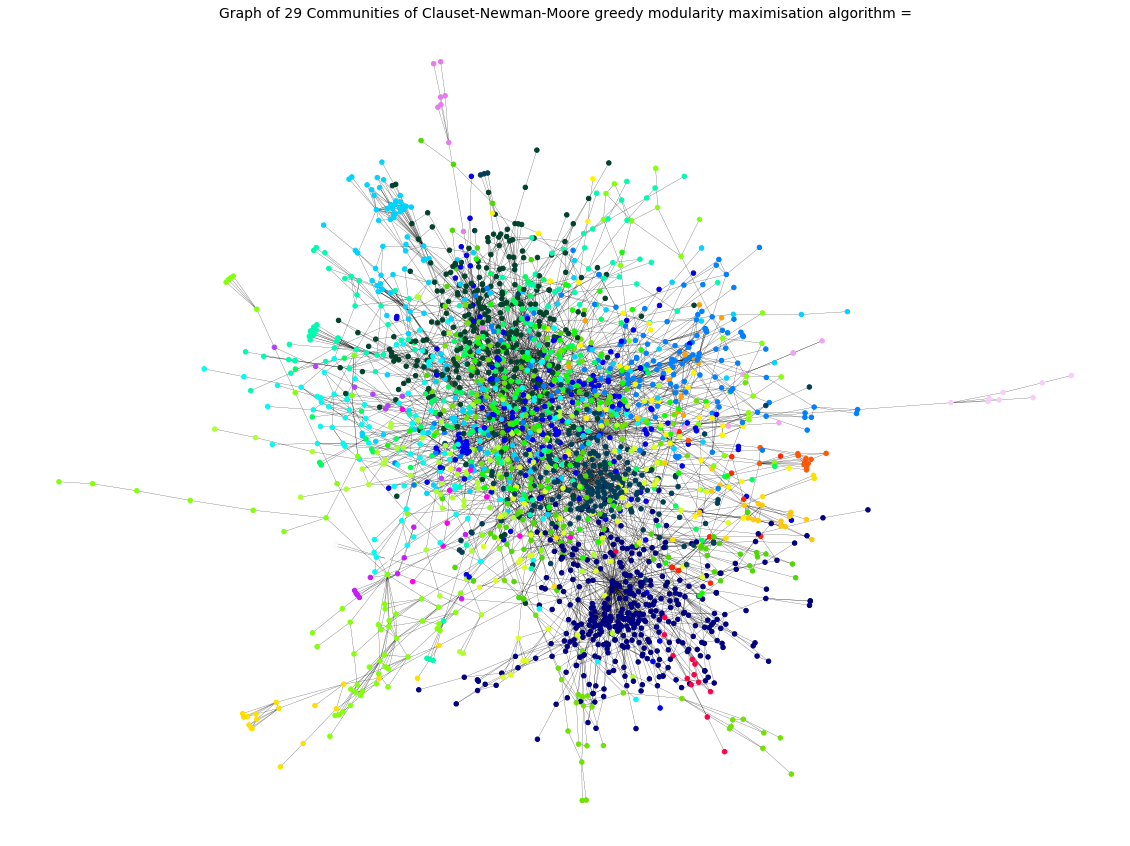

In [0]:
#sets figure size
plt.figure(figsize=(20, 15))
#efines the nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=20, node_color=comm,cmap=plt.cm.gist_ncar)
#defines edges
edges = nx.draw_networkx_edges(G, pos,width=0.2)
#makes graph look prettier
plt.axis('off')
plt.title("Graph of 29 Communities of Clauset-Newman-Moore greedy modularity maximisation algorithm =",fontsize=14)
plt.show()

The Communities seem fairly spread out, but do seem to have a dominante cluster in the dark blue colour and light green.

### Top 30 nodes according to Pagerank and Degree 

The following code creates a list of top 30 according to Degree and Pagerank.

In [0]:
#comm_deg is list of 30 most central nodes communtities wrt to degree
comm_deg=[]
#initialise top 30 commuities of page rank
comm_page=[]
#extracts index of top 30 nodes
ind_deg = np.argpartition(degree, -30)[-30:]
ind_page = np.argpartition(list(w3.values()), -30)[-30:]
#obatians index 
for i in ind_deg:
  #makes list
  comm_deg.append(comm[i])
for i in ind_page:
  #makes list
  comm_page.append(comm[i])

The following code extracts all the edges between the 30 most central nodes, outputting a tuple.

In [0]:
#creates dummy list
edges1=[]
for j in ind_deg:
  #extracts all edges of the 30 nodes
  a=G.edges([j])
  #interates over indexs
  for i in ind_deg:
    if i!=j:
      #so doesn't get edge to itslef
      edges1.append([item for item in a if i in item])
#gets rid of empmty tuples
edges2 = filter(None, edges1)
#formamts into a tuple of correct format for netwrokx
edges2=functools.reduce(operator.iconcat, edges2, [])
edges2=tuple(edges2)

The following code plots a graph of 30 most central nodes according to degree and page rank. With faint edges representing connections to nodes and bold edges connection between highly central nodes.

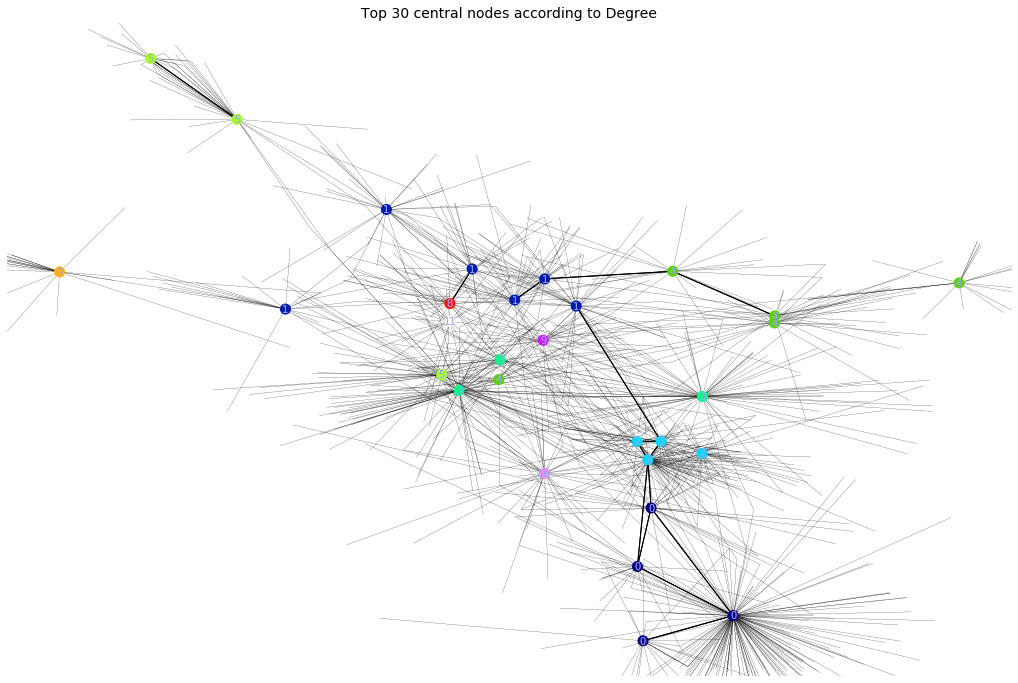

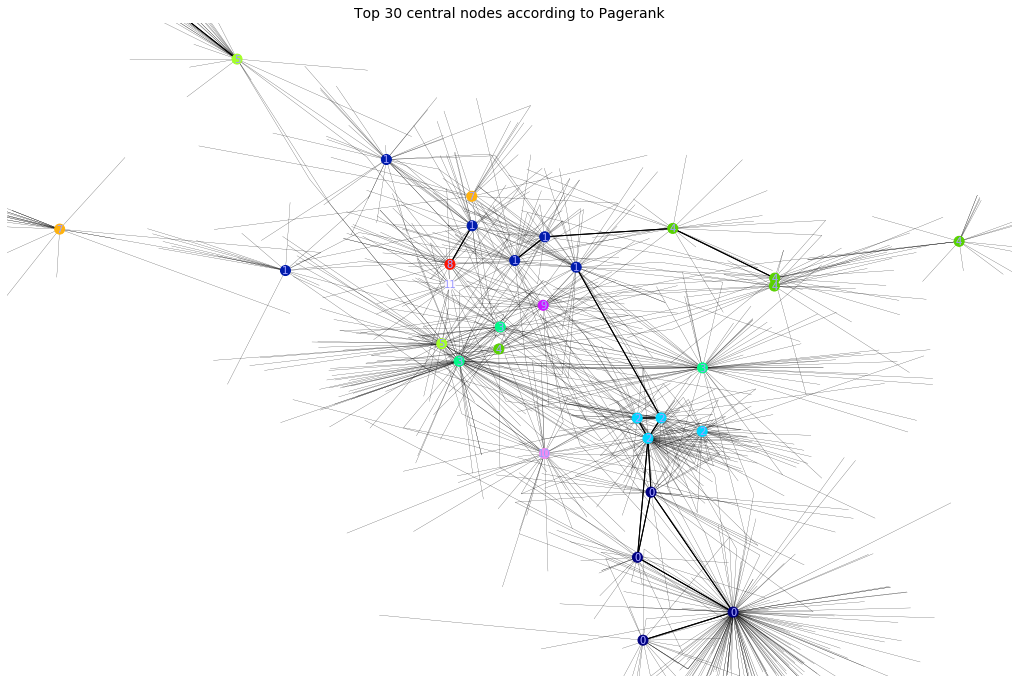

In [0]:
#this code makes a dictionary of labels of nodes n the graph
d = dict(zip(ind_deg,np.int_(comm_deg)))

#this code plotsa the graph
plt.figure(figsize=(18, 12))
#plots nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=100,nodelist=ind_deg,node_color=comm_deg,cmap=plt.cm.gist_ncar)
#plots edges between graphs
edges = nx.draw_networkx_edges(G, pos,width=1.0,edgelist=edges2)
#plots edges to any points
edges = nx.draw_networkx_edges(G, pos,width=0.2,edgelist=G.edges(ind_deg))
#plots node labels in different colors so can be seen on all nodes
labels = nx.draw_networkx_labels(G, pos,d,font_color='w',font_size=10,alpha=1)
labels = nx.draw_networkx_labels(G, pos,d,font_color='b',font_size=10,alpha=0.4)
#makes graph pretty
plt.title("Top 30 central nodes according to Degree",fontsize=14)
plt.axis('off')
plt.show()

#this code makes a dictionary of labels of nodes n the graph
d = dict(zip(ind_page,np.int_(comm_page)))

#this code plotsa the graph
plt.figure(figsize=(18, 12))
#plots nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=100,nodelist=ind_page,node_color=comm_page,cmap=plt.cm.gist_ncar)
#plots edges between graphs
edges = nx.draw_networkx_edges(G, pos,width=1.0,edgelist=edges2)
#plots edges to any points
edges = nx.draw_networkx_edges(G, pos,width=0.2,edgelist=G.edges(ind_page))
#plots node labels in different colors so can be seen on all nodes
labels = nx.draw_networkx_labels(G, pos,d,font_color='w',font_size=10,alpha=1)
labels = nx.draw_networkx_labels(G, pos,d,font_color='b',font_size=10,alpha=0.4)
#makes graph pretty
plt.title("Top 30 central nodes according to Pagerank",fontsize=14)
plt.axis('off')
plt.show()

As we can see there is no difference in these 2 graphs apart one node (one node being in community 5 and 7). This is to be expected do high correlation between Pagerank and Degree shown in last section.

**Explanantion**

The highly central nodes seem spread out amoung the communities, which is good sign. There are not very many connections within communities of nodes of high degree apart from communities 0,2 and 5 shown by bold edges. We would expect there to be very few connections between accross commmunities and many within communities due to the nature of the algorithm. As the algorimth optimises modularity of the nodes, the modularity effectively being how many connections there are within a community compared to random number of nodes. 

The reason why the algorithm is not performing prehaps as well as expected is due to the nature of the data, with it being fairly central and no clear commmunities actually existing, this is shown best when you look at community 1, with it having connections to many other communties and not itself. However it is still perfroming better the k-means as the when we look at all nodes, the communities are far more balanced.

## 1.4 Comparing feature and graph clusterings

### Comparing Clusters with AMI,ARI

This code produce an optimum model for KNN's clustering and gives model for communities of size 29 for direct comparasion between models.

In [11]:
CHscore=[]
ncluster=[]
k=0
for i in range(2,30):
   kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
   groups1=kmeans.fit(feature_matrix)
   labels = groups1.labels_
   CHscore.append(metrics.calinski_harabasz_score(feature_matrix,labels))
   ncluster.append(i)
   if CHscore[i-2]<7 and k==0:
     final_labs=labels
     print("number of k means communities=",i)
     k=k+1
   if i==29:
    comm_labs=labels


number of k means communities= 24


The following code calculates the CH, adjusted mutual info (AMI), adjusted rand score (ARI) and Fowlkes Mallows Score for Optimum number of K-means communities.




In [18]:
print('AMI',adjusted_mutual_info_score(comm,comm_labs))
print('ARI',adjusted_rand_score(comm,comm_labs))
print('fms',fowlkes_mallows_score(comm,comm_labs))
print('CH score for Kmeans 24*=', metrics.calinski_harabasz_score(feature_matrix,comm_labs))
print('CH score for CNM=', metrics.calinski_harabasz_score(feature_matrix,comm))

AMI 0.1621364800247902
ARI 0.07480580779996474
fms 0.18320703717221845
CH score for Kmeans 24*= 6.095728522973793
CH score for CNM= 3.9613731573321833


ARI performs better when clusters are roughly of equal size, which here for K-means any way they defiantly are not. For a ARI and AMI score of 0 the clustering are considered independent and 1 the same clusterings, ignoring permutations.

So here ARI is very low which is expected, meaning clusterings are very different, which agrees with the rest of evidence. AMI is still quite low but not as low as ARI that is because it performs better for unbalanced data sets. So it still suggests they are dissimalar.

The differences above for CH score and Fowlkes Mallows Score (ARI and AMI shouldn't be effected might be down to different number of communites, shown below are the results of comparasion with K-means for 29 communites. 

In [21]:
print('CH score for Kmeans 29=', metrics.calinski_harabasz_score(feature_matrix,final_labs))
print('CH score for CNM=', metrics.calinski_harabasz_score(feature_matrix,comm))
print('AMI',adjusted_mutual_info_score(comm,final_labs))
print('ARI',adjusted_rand_score(comm,final_labs))
print('fms',fowlkes_mallows_score(comm,final_labs))

CH score for Kmeans 29= 7.614849712147762
CH score for CNM= 3.9613731573321833
AMI 0.14956087268207918
ARI 0.06957820463709236
fms 0.16724759144413562


Intrestingly CH score difference increases, so they performing to different levels of quality. These score will be heavily skewed in K-means. But again FMS is indicating that the clustering are very strong dissimilar.   

### Visual comparison of graphs

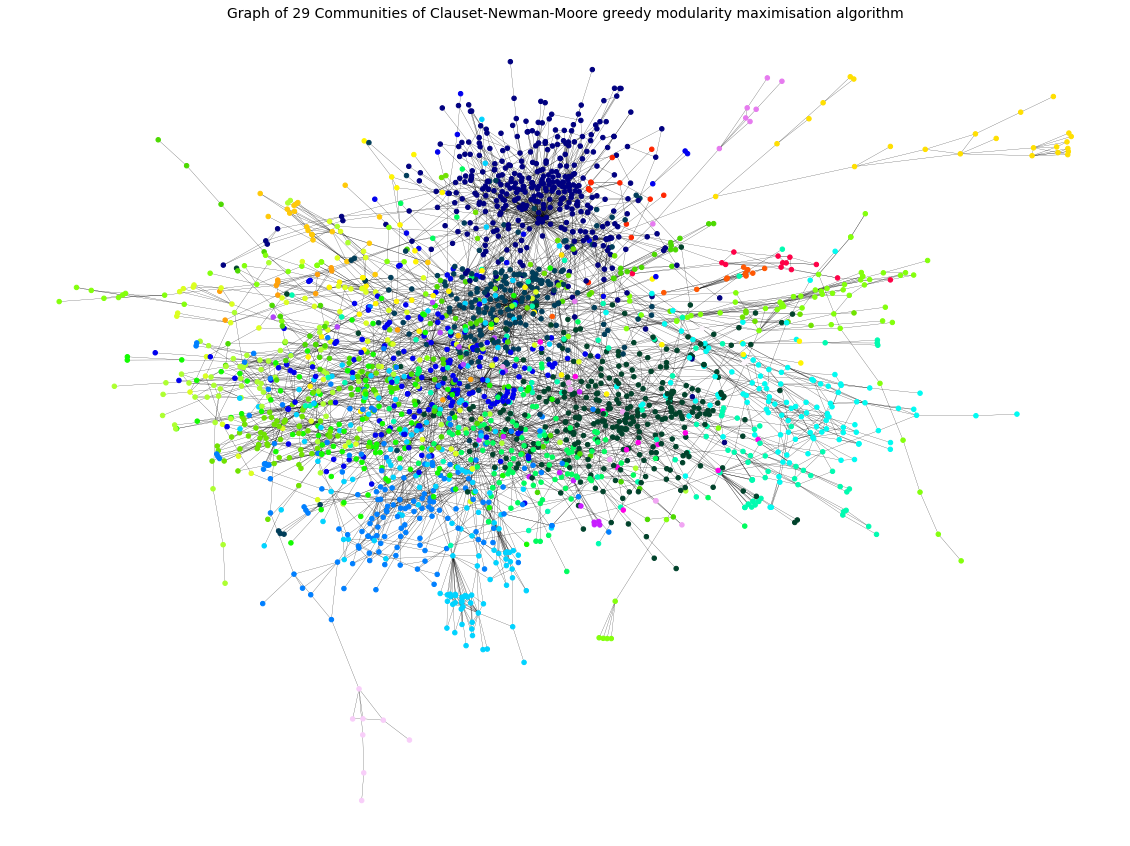

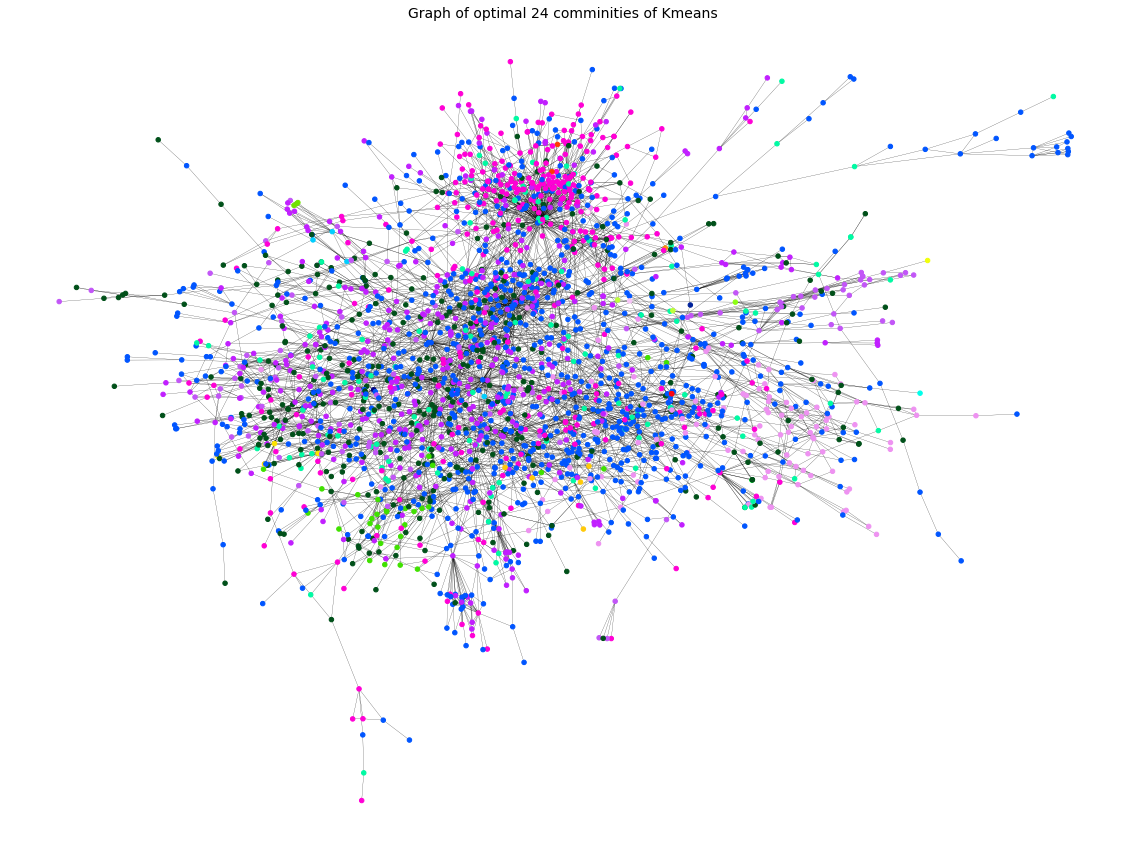

In [0]:
#sets figure size
plt.figure(figsize=(20, 15))
#efines the nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=20, node_color=comm,cmap=plt.cm.gist_ncar)
#defines edges
edges = nx.draw_networkx_edges(G, pos,width=0.2)
#makes graph look prettier
plt.axis('off')
plt.title("Graph of 29 Communities of Clauset-Newman-Moore(CNM) greedy modularity maximisation algorithm",fontsize=14)
plt.show()

#sets figure size
plt.figure(figsize=(20, 15))
#efines the nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=20, node_color=final_labs,cmap=plt.cm.gist_ncar)
#defines edges
edges = nx.draw_networkx_edges(G, pos,width=0.2)
#makes graph look prettier
plt.axis('off')
plt.title("Graph of optimal 24 Communities of K-means ",fontsize=14)
plt.show()



As we can see for CNN there seem to be well spaced cluster, which seem fairly well balanced as already discussed. However when we look K-means there seem to be a few very dominant clusters with some overlap. 

The code below extracts the index of the 30 highest degree for the K-means model.

In [0]:
#initialise top 30 commuities of page rank
comm_kmean=[]
#extracts index of top 30 nodes
ind_deg = np.argpartition(degree, -30)[-30:]
#obatians index 
for i in ind_deg:
  #makes list
  comm_kmean.append(final_labs[i])

The code below plots the 30 most central nodes according to degree for both models.

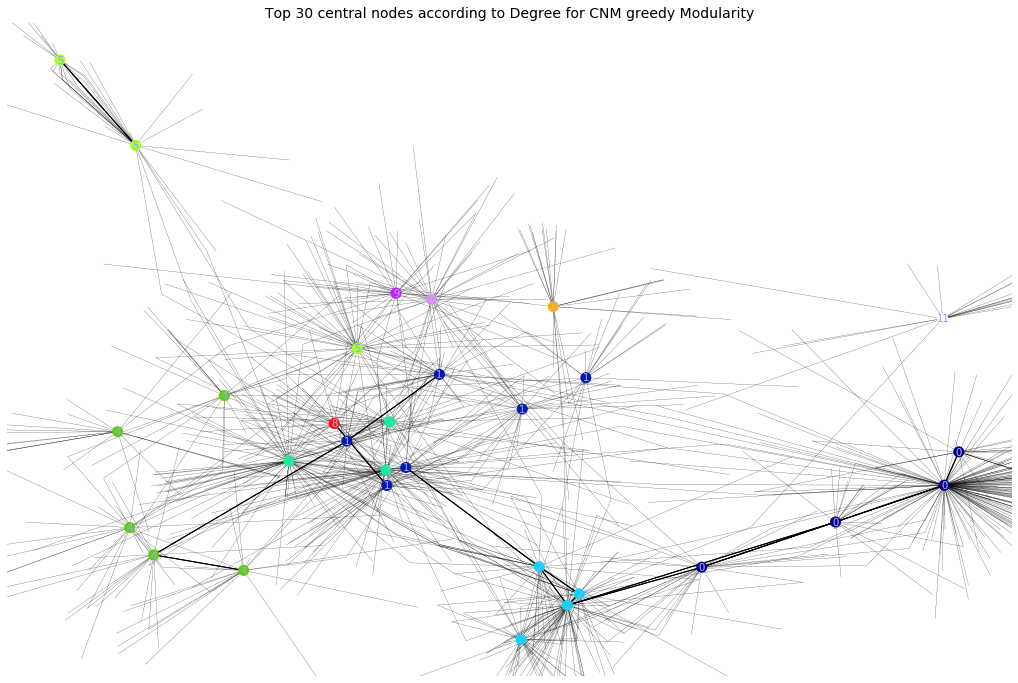

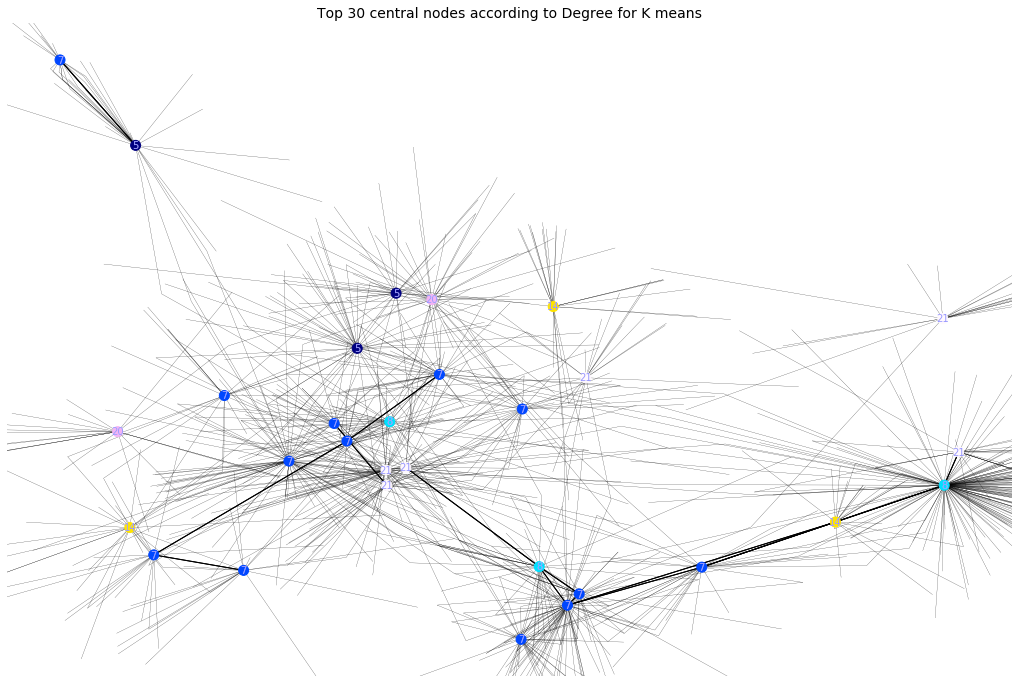

In [77]:
###########makes ############
###########this code makes a dictionary of labels of nodes n the graph############
d = dict(zip(ind_deg,np.int_(comm_deg)))
#this code plotsa the graph
plt.figure(figsize=(18, 12))
#plots nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=100,nodelist=ind_deg,node_color=comm_deg,cmap=plt.cm.gist_ncar)
#plots edges between graphs
edges = nx.draw_networkx_edges(G, pos,width=1.0,edgelist=edges2)
#plots edges to any points
edges = nx.draw_networkx_edges(G, pos,width=0.2,edgelist=G.edges(ind_deg))
#plots node labels in different colors so can be seen on all nodes
labels = nx.draw_networkx_labels(G, pos,d,font_color='w',font_size=10,alpha=1)
labels = nx.draw_networkx_labels(G, pos,d,font_color='b',font_size=10,alpha=0.4)
#makes graph pretty
plt.title("Top 30 central nodes according to Degree for CNM greedy Modularity",fontsize=14)
plt.axis('off')
plt.show()

##########makes graph for kmeans#############
d = dict(zip(ind_deg,np.int_(comm_kmean)))
#this code plotsa the graph
plt.figure(figsize=(18, 12))
#plots nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=100,nodelist=ind_deg,node_color=comm_kmean,cmap=plt.cm.gist_ncar)
#plots edges between graphs
edges = nx.draw_networkx_edges(G, pos,width=1.0,edgelist=edges2)
#plots edges to any points
edges = nx.draw_networkx_edges(G, pos,width=0.2,edgelist=G.edges(ind_deg))
#plots node labels in different colors so can be seen on all nodes
labels = nx.draw_networkx_labels(G, pos,d,font_color='w',font_size=10,alpha=1)
labels = nx.draw_networkx_labels(G, pos,d,font_color='b',font_size=10,alpha=0.4)
#makes graph pretty
plt.title("Top 30 central nodes according to Degree for K means",fontsize=14)
plt.axis('off')
plt.show()

As we can see K-means has a few clustering which really seem to dominate i.e clustering 7 (blue) in this case, which indicates the model is performing quite badly. Where as CNN seems to be performing alright, but not to the best of it's abilty as discussed previously. 

### Summary

I found that the K-means algorithm performed quite poorly in general. Many indicators pointed towards this e.g the Silhouette score and the Communities graph. It might have had better results if a different method to find optimum clustering was used e.g:

*   Finding the optimum clusters is by finding the maximum (or a spike in) in CHscore*(k-1).
*   Using an elbow method to recognise the optimum. 



 Even with these changes I believe the model would still have performed poorly due to the high dimensional nature of the problem. The CNM seemed to visually perform better and had far more concrete results with e.g to the Silhouette Score, So in this unsupervised learning problem I would recommended modeling the data as the CNM clusters.

#Task 2


### Loading and preparing the data

The following code obtain the data to be studied.

In [0]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml('Fashion-MNIST', cache=False)
X=mnist.data.astype('float32')
Y=mnist.target.astype('int64')


The following code puts 70000 images into a training and test set. The sets are random but well balanced. 

In [0]:
#uses built in functions to split data, fixed random state so same data every time
X_train1, X_test1, Y_train, Y_test = train_test_split(X, Y, test_size=10000, random_state=42,stratify=Y)

Just confirms sets are well balanced.

In [0]:
# class count
unique, counts = np.unique(Y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


##2.1 Unsupervised clustering of the image dataset

###  Using K-means in unsupervised manner on fasion-MNIST data 

The Following code produces data for cluster sizes for 2-30 and  it produces averages for 2-15 as beyond thes values the algorithm is too computationally expensive. 

In [0]:
#sets up lists for to stop performance data
CHscoreave=[]
inertiaave=[]
inertia=[]
#iterates to produce an average
for j in range(5):
  #resets scores
  CHscore=[]
  inertia=[]
  ncluster=[]
  nclusterave=[]
  #iterates changing cluster size
  for i in range(2,15):
    #sets kmeans model varying cluster size
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=5)
    #fits model
    groups1=kmeans.fit(X_train1)
    #extracts communities
    labels = groups1.labels_
    #works out CH score
    CHscore.append(metrics.calinski_harabasz_score(X_train1,labels))
    #creates cluster sizes for graphs
    ncluster.append(i)
    nclusterave.append(i)
    #works out inertia
    inertia.append(groups1.inertia_)
  #sets up average lists for first iteratiomn
  if j==0:
    CHscoreave=CHscore
    inertiaave=inertia
  else:
    #updates sum totals
    CHscoreave=np.add(CHscore,CHscoreave)
    inertiaave=np.add(inertia,inertiaave)
#makes avegaes
CHscoreave=np.divide(CHscoreave,j+1)
inertiaave=np.divide(inertiaave,j+1)

#iterates over larger cluster siuzes
for i in range(15,25):
  #sets kmeans model varying cluster size
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=5)
    #fits model
    groups1=kmeans.fit(X_train1)
    #extracts communities
    labels = groups1.labels_
    #works out CH score
    CHscore.append(metrics.calinski_harabasz_score(X_train1,labels))
    #creates cluster sizes for graphs
    ncluster.append(i)
    inertia.append(groups1.inertia_)


This code produces the CH score to indicate how the algorthm is performing.

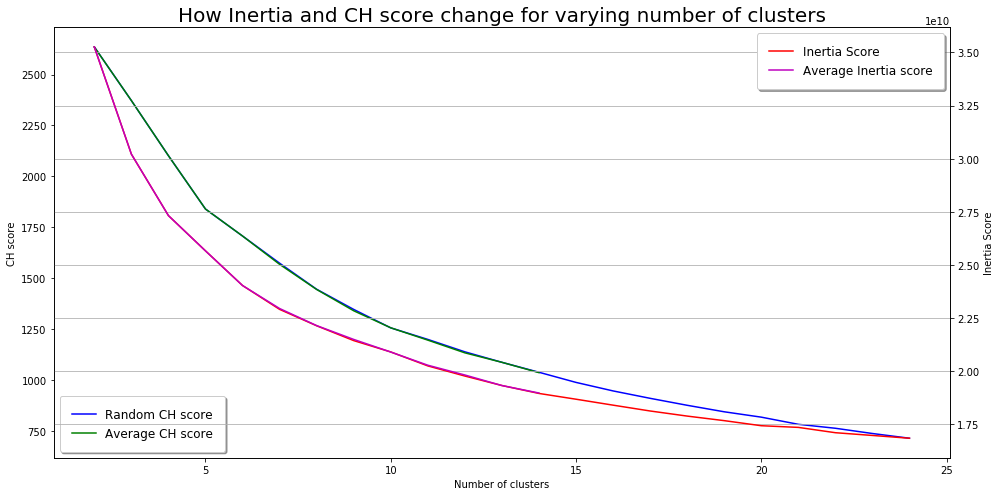

In [0]:
#sets up graph
fig, ax1 = plt.subplots(figsize =(14,7))

#plots CH score and first axis
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('CH score')
ax1.plot(ncluster,CHscore,label="Random CH score",color='b')
ax1.plot(nclusterave,CHscoreave,label="Average CH score",color='g')
ax1.tick_params(axis='y')

#plots inertia and 2nd axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Inertia Score')  # we already handled the x-label with ax1
ax2.plot(ncluster,inertia,label="Inertia Score",color='r')
ax2.plot(nclusterave,inertiaave,label="Average Inertia score",color='m')
ax2.tick_params(axis='y')

#plots tiitle and legend and tidys up layout
plt.title('How Inertia and CH score change for varying number of clusters',fontsize=20)
ax1.legend(loc="lower left", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc="upper right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.grid(b=None) 
plt.show()

As we can see as number of clusters increases CH and inertia decrease rather smoothly, it appears the clustering seem quite consisant shown by average score covering the random score.

### How to deal with inherent randomness of K-means

In this sitaution the K-means algoritm doesn't seem too random shown by the average CH and inertia score being very similar to a random score. However to reduce the randomness of the algoritm you can either increases number interation you test over or you can fix the random seed so you get the same result ever time. You can also use K++ initialisation, as discussed in task 1, this improve convergence of results by generally placing centroids far apart (instead of just randomlly), so I do this by default.

Increasing number of interations means you will get a better result and more consistenlty, however it very computationally expensive.  

### Evidence for 10 classes with K-means

**CH and Inertia**

The following code produces graph where I have multplied CH by (number of clusters-1) as in some of the litriature it states that you should get a maximum (or a spike in) in CH score*(k-1) for optimum number of clusters. Since as CH score changes wrt to number of clusters k it should be proportional to $ \frac{1}{k-1} $.

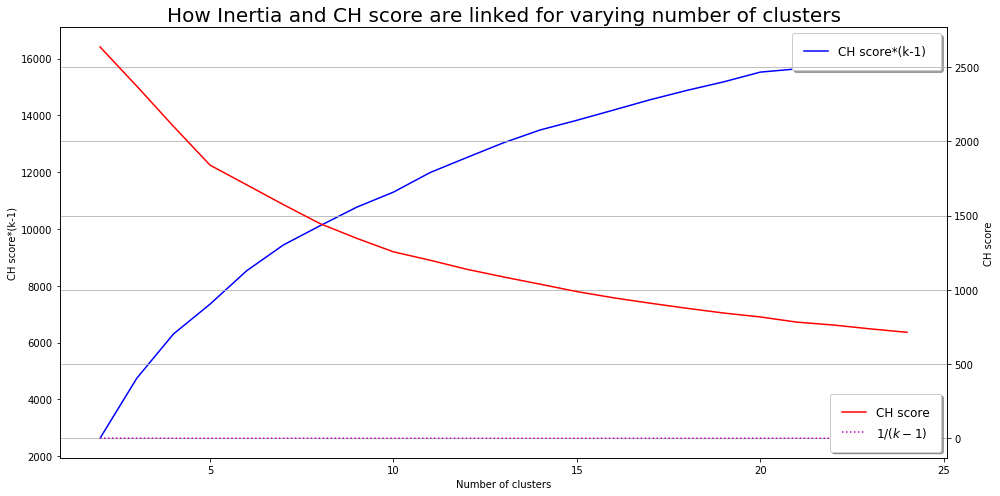

In [0]:
#makes 1/(k-1) line
k_1=np.divide(1,np.add(ncluster,-1))
#sets up graph
fig, ax1 = plt.subplots(figsize =(14,7))

#plots CH score and first axis
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('CH score*(k-1)')
ax1.plot(ncluster,np.multiply(CHscore,np.add(ncluster,-1)) ,label="CH score*(k-1) ",color='b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('CH score')  # we already handled the x-label with ax1
ax2.plot(ncluster,CHscore,label="CH score",color='r')
ax2.plot(ncluster,k_1,label="$ 1/(k-1) $",color='m',linestyle=':')
ax2.tick_params(axis='y')


#plots tiitle and legend and tidys up layout
plt.title('How Inertia and CH score are linked for varying number of clusters',fontsize=20)
ax1.legend(loc="upper right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc="lower right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.grid(b=None) 
plt.show()

However as we can see there appears to be no maximum for the blue line. The dotted line and red line do not appear nearly intersect at any point. So either the optimum number of cluster is larger than 25 cluster or Ch score is not really indictating anything or Kmeans is not performing very well at all. Let us see if the siloutte score indicates anything.

For n_clusters = 3 The average silhouette_score is : 0.18490338
For n_clusters = 8 The average silhouette_score is : 0.15408982
For n_clusters = 10 The average silhouette_score is : 0.15240167
For n_clusters = 12 The average silhouette_score is : 0.13897198
For n_clusters = 15 The average silhouette_score is : 0.12603506


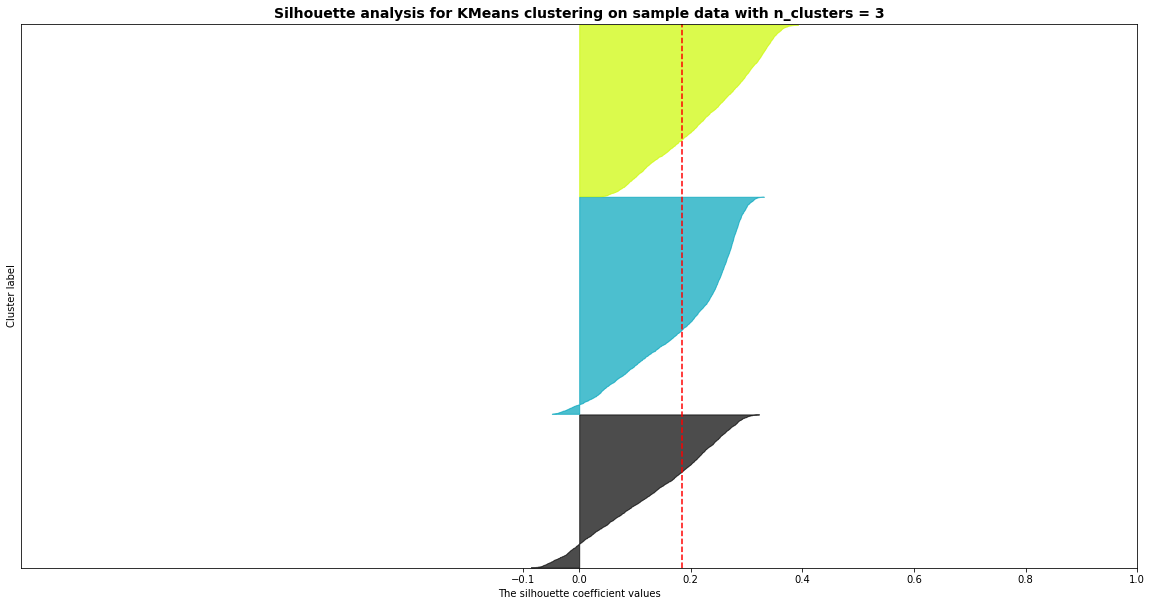

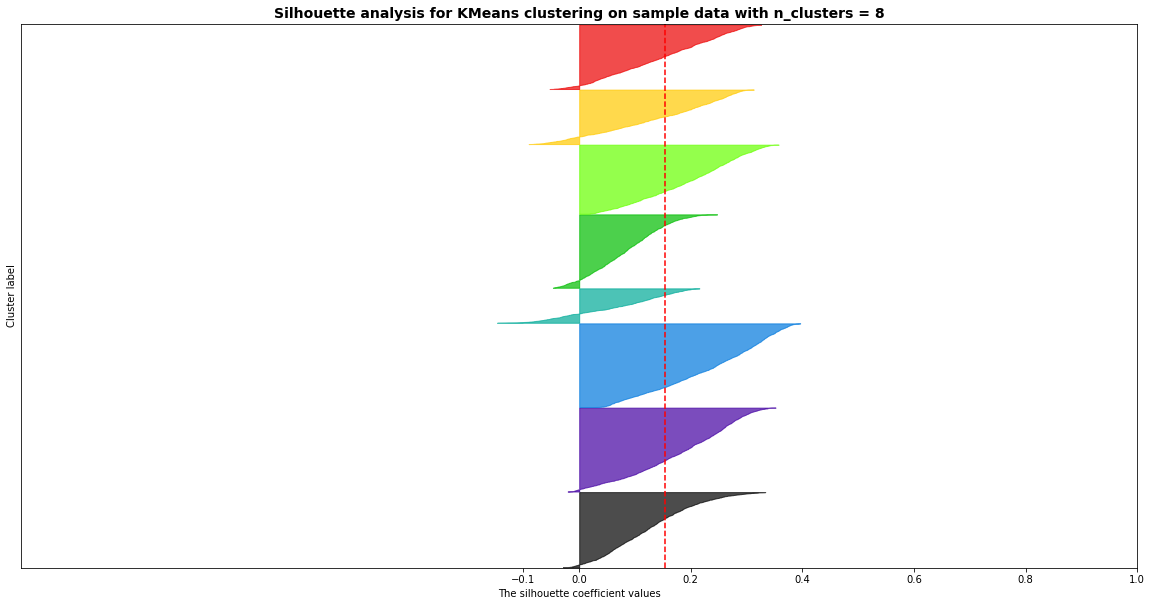

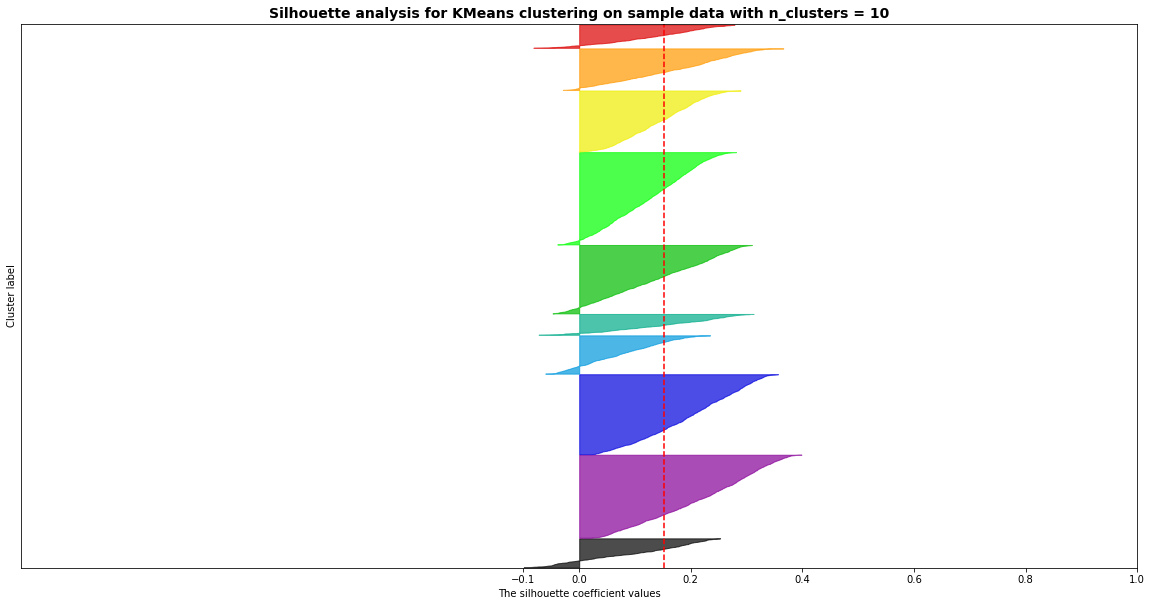

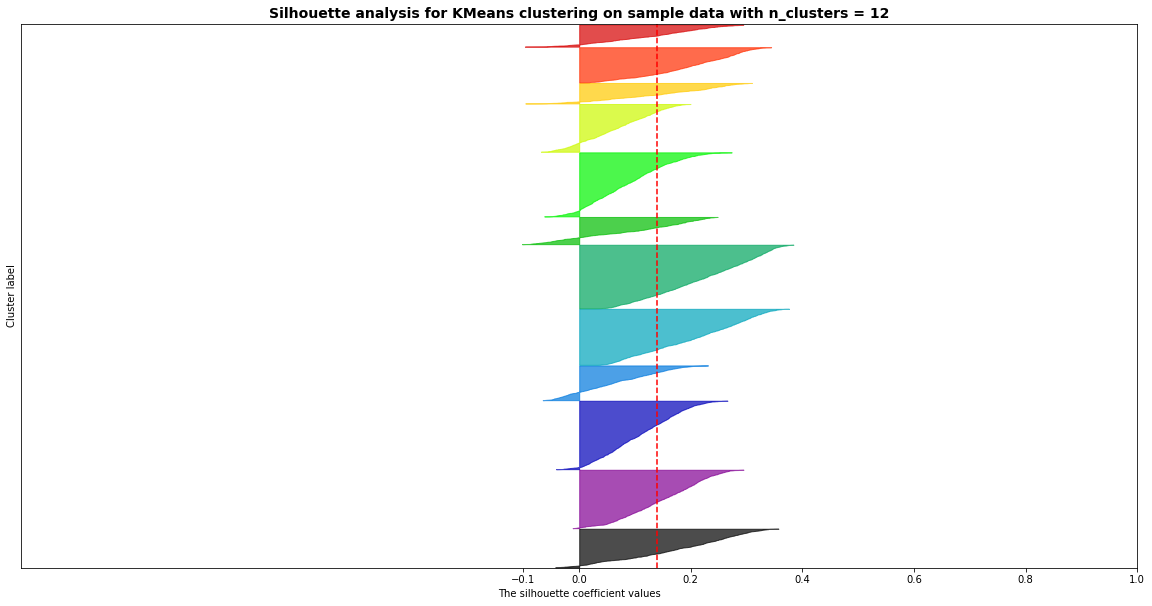

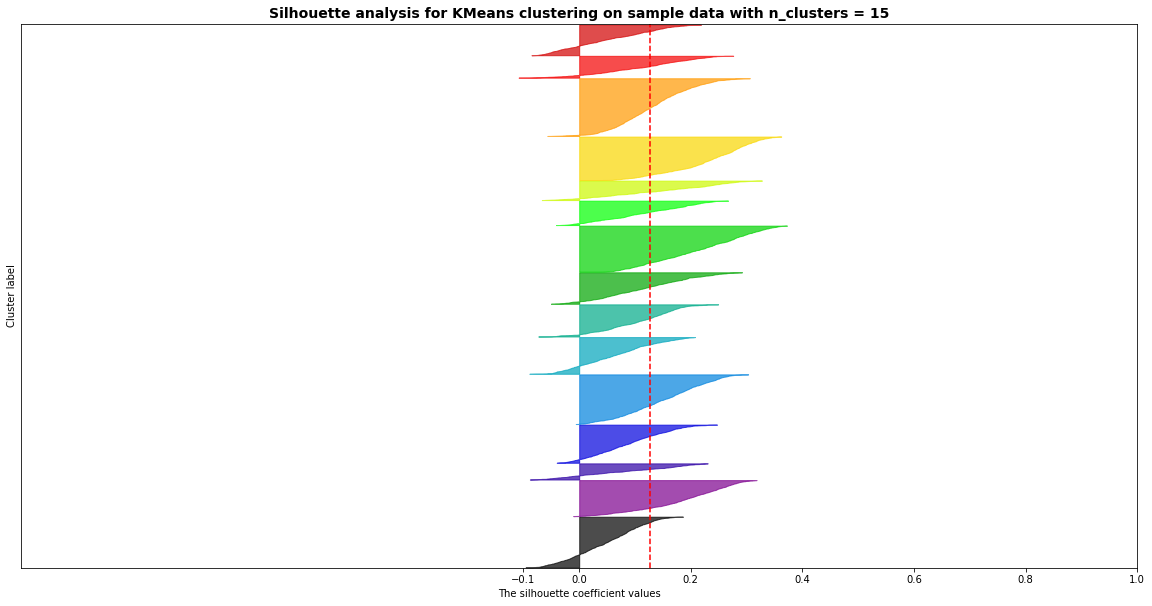

In [0]:
#number of cluster to test siloutte score of.
range_n_clusters = [3,8,10,12,15]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(20, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10)
    cluster_labels = clusterer.fit_predict(X_train1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

These graphs are far more promising the average silloute score is generally quite good inthat it is postive, it also start to decrease after 10 clusters suggesting there are 10 or less clusters. If you look at the graphs this is reineforced as the graphs with 10 or less have far less negative tails. However it is hard to distingsuh whethere there are 10 or less clusters.

**Conclusion**
There is not that much evidence for there being 10 clusterings, however the siloutte score does suggest there is less than 10. This is probably down to the general bad performance of the K-means algorithm.

### Other Unsupervised Methods

The only other methods tentatively mentioned in class where K-mediodes however it performs very badly and doesn't not help in suggesting there are 10 classes. It was also computationally quite expensive to perform and has to be installed from sk learn extra. 

However a more promising model was the Hierarchical model using the Agglomerative Clustering Algorithm, however it was just far to computationaly expensive. The code to fit the model is shown below. 

A way round this would to be to do PCA to reduce the dimensionality and then fit the model on this. However due to time restraints I did not test this method.

In [0]:
#set up model
Hclustering = AgglomerativeClustering()
#fit model
group3=Hclustering.fit(X_train1)

### 10 Clusters for K-means

The following code extracts data of images of each of the corrected labeled items of clothing.

In [0]:
#ground truth labels for accuracy test
clothing_labels=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boots']
#colour maps
colour_maps=['Greys','Reds','Greens','Blues','Purples','Oranges','RdPu','GnBu','BuGn','YlOrBr']
# makers example clothing list of 
clothes=np.zeros((10,784))
#set dummy varible
k=10
j=-1
# finds 10 example images
for i in range(10):
  while j<i:
    if Y_train[k]==i:
      #assaing data to list
      clothes[i]=X_train1[k]
      #update index
      j=j+1
    else:
      k=k+1

This code shows the images, with the index going from 0 to 10.

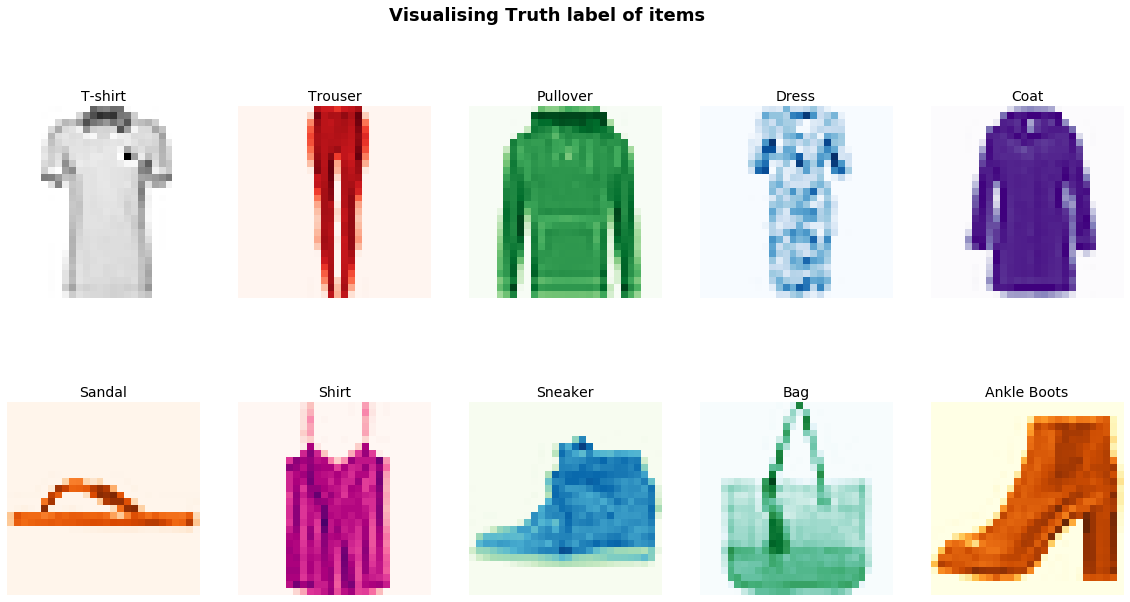

In [0]:
fig, axes = plt.subplots(2,5,figsize=(20,10))
plt.suptitle(('Visualising Truth label of items'),
                 fontsize=18, fontweight='bold')
for i in range(10):
  if i<5:
    axes[0,i].imshow(clothes[i].reshape(28,28),cmap=colour_maps[i])
    axes[0,i].axis('off')
    axes[0,i].set_title((clothing_labels[i]),
                 fontsize=14)

  else:
    axes[1,i-5].imshow(clothes[i].reshape(28,28),cmap=colour_maps[i])
    axes[1,i-5].axis('off')
    axes[1,i-5].set_title((clothing_labels[i]),
                 fontsize=14)


The following code fits a k-means with a fixed random seed to get same results every time, which is crucial when labeling the clusters.

In [0]:
#sets kmeans model varying cluster size
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=20,random_state=20)
#fits model
clusterings=kmeans.fit(X_train1)
#get centroids
D1=clusterings.cluster_centers_

The code below shows the manually given labels for the centriods.

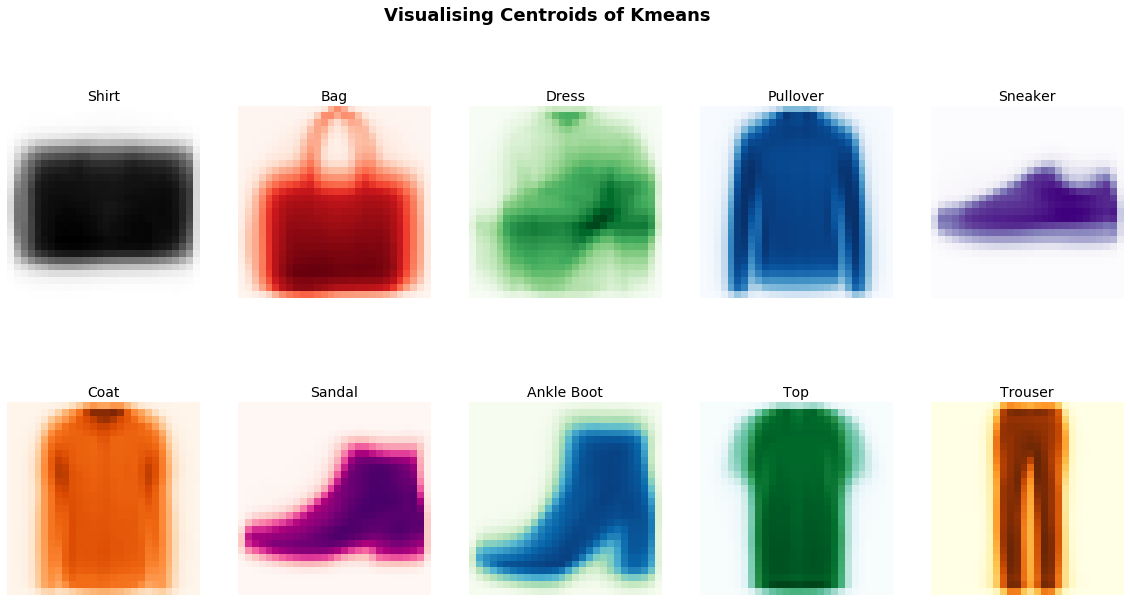

In [14]:
#plt.imshow(D1[1].reshape(28,28))
fig, axes = plt.subplots(2,5,figsize=(20,10))
plt.suptitle(('Visualising Centroids of Kmeans'),
                 fontsize=18, fontweight='bold')
for i in range(10):
  if i<5:
    axes[0,i].imshow(D1[i].reshape(28,28),cmap=colour_maps[i])
    axes[0,i].axis('off')
    axes[0,i].set_title((clothing_labels_kmeans[i]),
                 fontsize=14)

  else:
    axes[1,i-5].imshow(D1[i].reshape(28,28),cmap=colour_maps[i])
    axes[1,i-5].axis('off')
    axes[1,i-5].set_title((clothing_labels_kmeans[i]),
                 fontsize=14)


The code below defines manually choosen labels for the centroids and gives an indexing map to work out the accuracy. You could use CNN or majority rules to do this task, but then you could argue that it would be supervised learning but then so is guessing the images.

In [0]:
#ground truth labels for accuracy test for diagram
clothing_labels_kmeans=['Shirt','Bag','Dress','Pullover','Sneaker','Coat','Sandal','Ankle Boot','Top','Trouser']
#clustering mapping
clothing_labels_kmeans2=[6,8,3,2,7,4,5,9,0,1]

In [13]:
#use Kmeans to predict test set
test_labels=clusterings.predict(X_test1)
#mapped labelings to give more true accuracy score for trianing and test data
predicted_kmeans=[clothing_labels_kmeans2[x] for x in clusterings.labels_]
predicted_kmeans1=[clothing_labels_kmeans2[x] for x in test_labels]

#works out aaccuracy score and prints them
print('training accuracy=',metrics.accuracy_score(predicted_kmeans,Y_train))
print('test accuracy=',metrics.accuracy_score(predicted_kmeans1,Y_test))

training accuracy= 0.40298333333333336
test accuracy= 0.4031


As we can see it is not the best predictor, but it is still reasonable, this could be prehaps increased by using majority rules to assign clustering labels.

### KNN model and performance

The following code fits a KNN with only 3 nearest neighbors as the algorithm is very computationally expensive.

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train1,predicted_kmeans)
predicted_kmeans2=neigh.predict(X_test1)

The following code produces relevent statisctics on its performance.


In [16]:
print(metrics.classification_report(Y_test,predicted_kmeans2, target_names=clothing_labels))
print('out of test accuracy=',metrics.accuracy_score(predicted_kmeans2,Y_test))

              precision    recall  f1-score   support

     T-shirt       0.46      0.58      0.51      1000
     Trouser       0.60      0.91      0.72      1000
    Pullover       0.37      0.61      0.46      1000
       Dress       0.07      0.09      0.08      1000
        Coat       0.15      0.17      0.16      1000
      Sandal       0.07      0.05      0.06      1000
       Shirt       0.03      0.01      0.02      1000
     Sneaker       0.74      0.77      0.76      1000
         Bag       0.99      0.41      0.58      1000
 Ankle Boots       0.94      0.43      0.59      1000

    accuracy                           0.40     10000
   macro avg       0.44      0.40      0.39     10000
weighted avg       0.44      0.40      0.39     10000

out of test accuracy= 0.4025


As we can see precision is good for the images which where visibily quite clear like trousers. But then for the X-ray (Dress) and blob image (Shirt) we get very poor results. The recall is good in similar way to presion which is reflected in the f1 score which is combination of both. It is pretty reasonable at predicticting for an unsupervised model

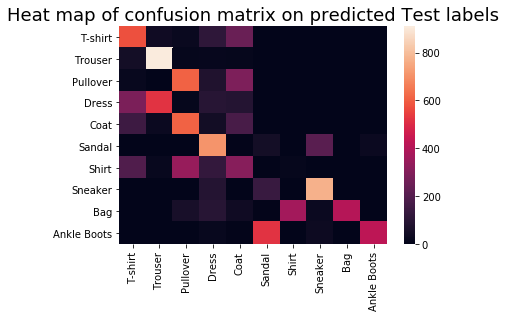

In [17]:
sns.heatmap(metrics.confusion_matrix(Y_test,predicted_kmeans2),xticklabels=clothing_labels,yticklabels=clothing_labels)
plt.title('Heat map of confusion matrix on predicted Test labels',fontsize=18)
plt.show()

This gives us similar results to the classification report, with it saying it prects trousers well and things like shirt and dress very badly. 

## 2.2 Supervised classification on the training set.

## 2.2.1 MLP neural network supervised 

Following code sets basic attributes.

In [0]:
#basic attrributes of neural netwrok
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.005

In [0]:
#maybe extract randomly /balnace sets
X_train2=X[0:60000,:]
X_test2=X[60000:,:]
Y_train2=Y[0:60000]
Y_test2=Y[60000:]

In [0]:
# prepare data loading standised balanced data
x_train = torch.from_numpy(X_train1).float()
y_train = torch.from_numpy(Y_train).float()
x_test = torch.from_numpy(X_test1).float()
y_test = torch.from_numpy(Y_test).float()

In [0]:
# split data into batchs and into a form the neural network can understand 
train0 = torch.utils.data.TensorDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train0, batch_size=batch_size,shuffle=True)
#does the same for test data
test0 = torch.utils.data.TensorDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test0, batch_size=batch_size)

In [0]:
#function to produce neural network results train_data and test_data have to be data loader format.
def nenet(train_data,test_data,learning_rate=0.01,num_epochs=120):
  #important data has to be in train loader form
  train_loader=train_data
  #data u want to test put training data in if u want traing error
  test_loader=test_data
  ###########################
  #define our neural network#
  ###########################
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          #first layer takes input data into 200 nodes in hidden layer
          self.fc1 = nn.Linear(input_size, hidden_size)
         #second hidden layer 
          self.fc2 = nn.Linear(hidden_size, hidden_size)
        #drop out rate included default is =0 then drop out has no effect
          self.fc3 = nn.Linear(hidden_size, hidden_size)
        #output layer
          self.fc4 = nn.Linear(hidden_size, num_classes)
   
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out = F.relu(self.fc3(out))
          out = self.fc4(out)
          #converts probabilties beteen 0 and 1 if softmax is set true
          out= F.log_softmax(out,dim=1)
          return out

  
  #defines our basic neural network object 
  net = NeuralNet(input_size, hidden_size, num_classes)
  # loss
  criterion = nn.NLLLoss()
  
  # optimiser
  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate) 
  
  #create loss array 
  loss_values = []
  #create number of epochs array for graph purposes
  epocsarray=[]
  #test and train arrays
  test_arr=[]
  train_arr=[]

  for epoch in range(num_epochs+1):

    ###################
    # train the model #
    ###################
    net.train()
    train_loss = 0.0
    #cpunt 

    for i, (images, labels) in enumerate(train_loader, 0):
    
      # reshape images to long vector
      images = images.reshape(-1, 28*28)
      labels = labels.squeeze_().type(torch.LongTensor)
        
      # forward pass
      outputs = net(images)
      loss = criterion(outputs, labels)
        
      # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

      # update loss
      train_loss += loss.item()

  
    loss_values.append(train_loss)
    epocsarray.append(epoch)

    ##################################
    # test the model on training data#
    ###################################
    net.eval()
    #reset correct and total
    correct = 0
    total = 0
    #interate through batches of train data
    for images, labels in train_loader:
      #reshape data appopriately
        images = images.reshape(-1, 28*28)
        labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
        outputs = net(images)
        #work index of max prob
        _, predicted = torch.max(outputs.data, 1)
        #number of labels
        total += labels.size(0)
        #number of correctly classified results
        correct += (predicted == labels).sum().item()
    train_acc=100 * correct / total
    train_arr.append(train_acc)
    #reset variables
    test_output=[]
    correct = 0
    total = 0
    for images, labels in test_loader:
      #reshape data appopriately
        #images = images.reshape(-1, 1*6)
        images = images.reshape(-1, 28*28)
        labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
        outputs = net(images)
        #work index of max prob
        _, predicted = torch.max(outputs.data, 1)
        #prediction
        test_output.extend(list(predicted.numpy()))
        #number of labels
        total += labels.size(0)
        #number of correctly classified results
        correct += (predicted == labels).sum().item()
    test_acc=100 * correct / total
    test_arr.append(test_acc)
  return loss_values,epocsarray,train_acc,test_acc,test_arr,train_arr

In [0]:
loss_values,epocsarray,train_acc,test_acc,test_arr,train_arr=nenet(train_loader,test_loader,learning_rate,num_epochs)

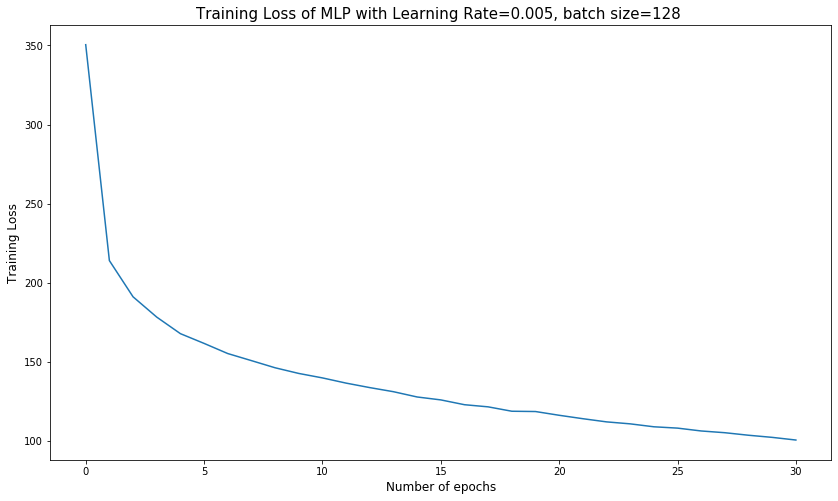

accuracy on training set= 92.14666666666666
accuracy on test set= 87.82


In [28]:
#plots a scatter graph
plt.figure(figsize=(14, 8))
plt.plot(epocsarray,loss_values,label="blah")
#labels axis
plt.xlabel('Number of epochs',size=12)
plt.ylabel('Training Loss',size=12)
#gives title
plt.title('Training Loss of MLP with Learning Rate=0.005, batch size=128 ',size=15)
#gives legend
#plt.legend(loc="lower left",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
print('accuracy on training set=',train_acc)
print('accuracy on test set=',test_acc)

The following code shows how the test and training accuracy vary as the model is trained.

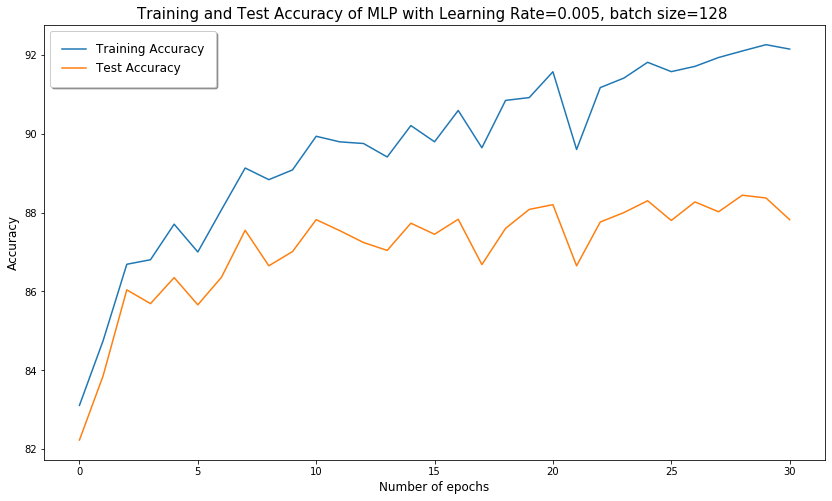

In [27]:
#plots a scatter graph
plt.figure(figsize=(14, 8))
plt.plot(epocsarray,train_arr,label="Training Accuracy")
plt.plot(epocsarray,test_arr,label="Test Accuracy")
#labels axis
plt.xlabel('Number of epochs',size=12)
plt.ylabel('Accuracy',size=12)
#gives title
plt.title('Training and Test Accuracy of MLP with Learning Rate=0.005, batch size=128 ',size=15)
#gives legend
plt.legend(loc="upper left",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()


It appears to be working quite well giving a consistant 88% test accuracy.

##2.2.2 CNN

The following code defines a function to train a CNN with architecture described in question.

In [0]:
#function to produce neural network results train_data and test_data have to be data loader format.

def cnn_func(train_data,test_data,learning_rate=0.01,num_epochs=120):
  #important data has to be in train loader form
  train_loader=train_data
  #data u want to test put training data in if u want traing error
  test_loader=test_data
  ###########################
  #define our neural network#
  ###########################
  class ConvNet(nn.Module):
      def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5, stride=1, dilation=1),nn.ReLU(),nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(6, 16, kernel_size=5, stride=1, dilation=1),nn.ReLU(),nn.MaxPool2d(kernel_size=2, stride=2),nn.Flatten())
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


      def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
       # out = out.reshape(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        out= F.log_softmax(out,dim=1)
        return out


  
  #defines our basic neural network object 
  CNN = ConvNet()
  # loss
  criterion = nn.NLLLoss()
  
  # optimiser
  optimiser = torch.optim.SGD(CNN.parameters(), lr=learning_rate) 
  
  #create loss array 
  loss_values = []
  #create number of epochs array for graph purposes
  epocsarray=[]
  test_arr=[]
  train_arr=[]

  for epoch in range(num_epochs+1):

    ###################
    # train the model #
    ###################
    CNN.train()
    train_loss = 0.0
    #cpunt 

    for i, (images, labels) in enumerate(train_loader, 0):
      # reshape images to long vector
      images = images.reshape((len(images), 28, 28))
      images = images[:,None, :, :]
      labels = labels.squeeze_().type(torch.LongTensor)
        
      # forward pass
      outputs = CNN(images)
      loss = criterion(outputs, labels)
        
      # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

      # update loss
      train_loss += loss.item()

  
    loss_values.append(train_loss)
    epocsarray.append(epoch)

    ##################################
    # test the model on training data#
    ###################################
    CNN.eval()
    #reset correct and total
    correct = 0
    total = 0
    #interate through batches of train data
    for images, labels in train_loader:
      #reshape data appopriately
        images = images.reshape((len(images), 28, 28))
        images = images[:,None, :, :]
        labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
        outputs = CNN(images)
        #work index of max prob
        _, predicted = torch.max(outputs.data, 1)
        #number of labels
        total += labels.size(0)
        #number of correctly classified results
        correct += (predicted == labels).sum().item()
    train_acc=100 * correct / total
    train_arr.append(train_acc)
    #reset variables
    test_output=[]
    correct = 0
    total = 0
    for images, labels in test_loader:
      #reshape data appopriately
      images = images.reshape((len(images), 28, 28))
      images = images[:,None, :, :]
      labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
      outputs = CNN(images)
        #work index of max prob
      _, predicted = torch.max(outputs.data, 1)
        #prediction
      test_output.extend(list(predicted.numpy()))
        #number of labels
      total += labels.size(0)
        #number of correctly classified results
      correct += (predicted == labels).sum().item()
    test_acc=100 * correct / total
    test_arr.append(test_acc)
  return loss_values,epocsarray,train_acc,test_acc,test_arr,train_arr

In [0]:
loss_values1,epocsarray1,train_acc1,test_acc1,test_arr1,train_arr1=cnn_func(train_loader,test_loader,learning_rate,num_epochs)

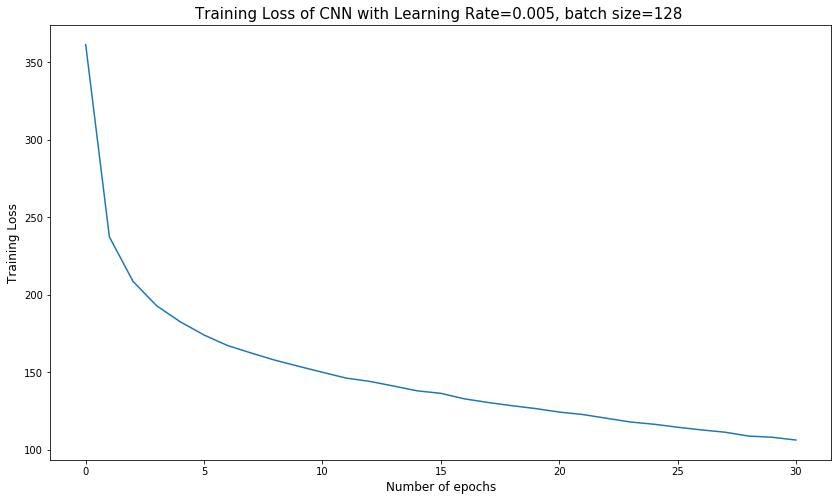

accuracy on training set= 91.92166666666667
accuracy on test set= 88.18


In [37]:
#plots a scatter graph
plt.figure(figsize=(14, 8))
plt.plot(epocsarray1,loss_values1,label="LR=0.01,Softmax=False")
#plt.plot(epocsarray,loss_values1,label="LR=0.01, Softmax=True")
#labels axis
plt.xlabel('Number of epochs',size=12)
plt.ylabel('Training Loss',size=12)
#gives title
plt.title('Training Loss of CNN with Learning Rate=0.005, batch size=128 ',size=15)
#gives legend
#plt.legend(loc="lower left",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
print('accuracy on training set=',train_acc1)
print('accuracy on test set=',test_acc1)

The following code produces training and test accuracy as epochs increases.

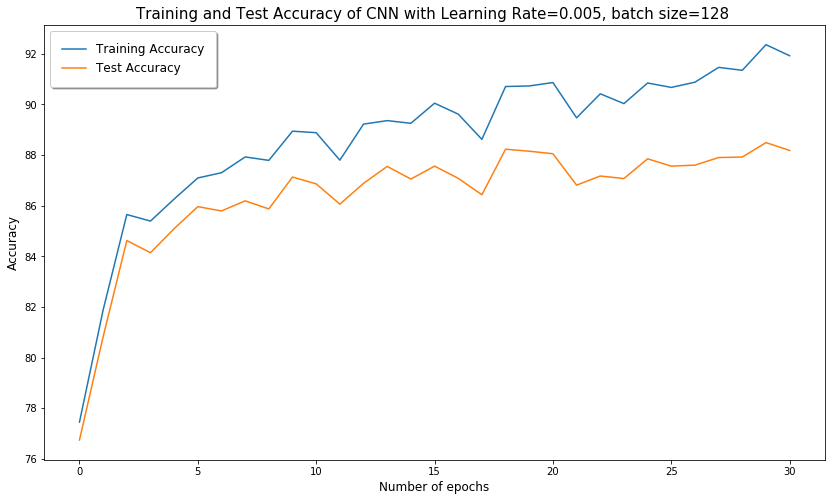

In [38]:
#plots a scatter graph
plt.figure(figsize=(14, 8))
plt.plot(epocsarray1,train_arr1,label="Training Accuracy")
plt.plot(epocsarray1,test_arr1,label="Test Accuracy")
#labels axis
plt.xlabel('Number of epochs',size=12)
plt.ylabel('Accuracy',size=12)
#gives title
plt.title('Training and Test Accuracy of CNN with Learning Rate=0.005, batch size=128 ',size=15)
#gives legend
plt.legend(loc="upper left",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

## 2.2.3 Comparisons of Classifiers:

### Performance of CNN and MLP

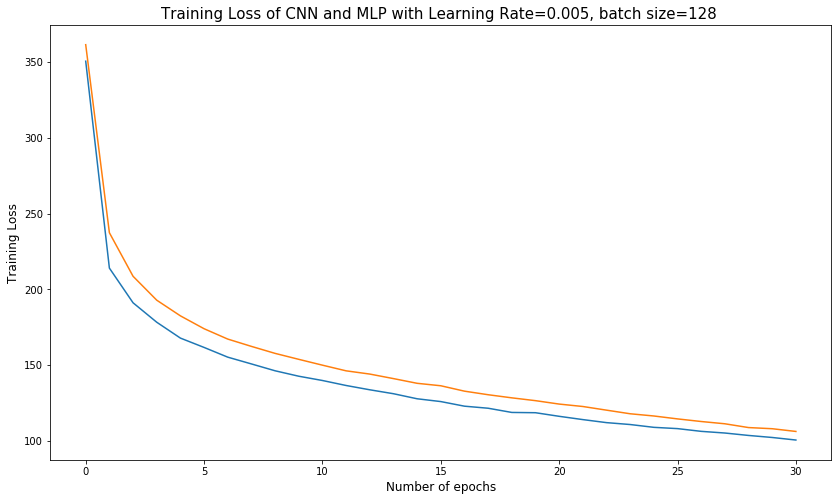

In [39]:
#plots a scatter graph
plt.figure(figsize=(14, 8))
plt.plot(epocsarray,loss_values,label="MLP")
plt.plot(epocsarray,loss_values1,label="CNN")
#labels axis
plt.xlabel('Number of epochs',size=12)
plt.ylabel('Training Loss',size=12)
#gives title
plt.title('Training Loss of CNN and MLP with Learning Rate=0.005, batch size=128 ',size=15)
#gives legend
#plt.legend(loc="lower left",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

They perform almost identically when you look at the training loss, which is a little surprising given how different there architectures are. But both seem to performing well with a smooth graph and no signs of overfitting and looking like they are converging to a model.


The following code produces the accuracy graph.

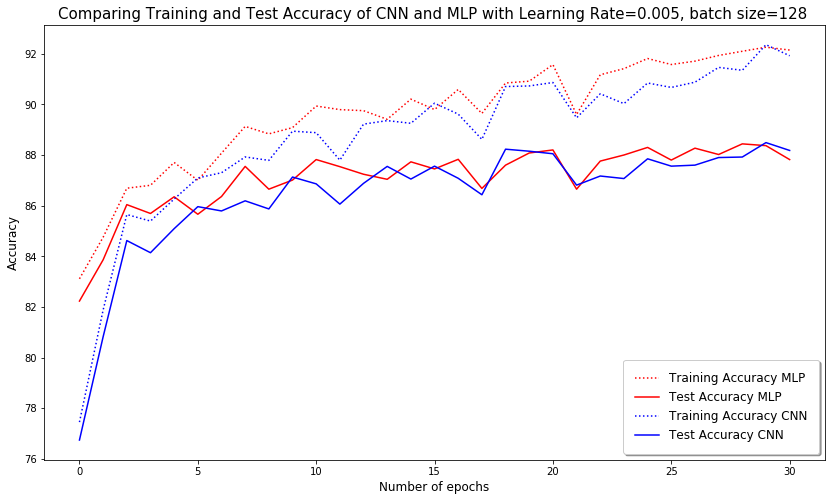

In [48]:
#plots a scatter graph
plt.figure(figsize=(14, 8))
plt.plot(epocsarray,train_arr,label="Training Accuracy MLP",color='r',linestyle=':')
plt.plot(epocsarray,test_arr,label="Test Accuracy MLP",color='r')
plt.plot(epocsarray1,train_arr1,label="Training Accuracy CNN",color='b',linestyle=':')
plt.plot(epocsarray1,test_arr1,label="Test Accuracy CNN",color='b')
#labels axis
plt.xlabel('Number of epochs',size=12)
plt.ylabel('Accuracy',size=12)
#gives title
plt.title('Comparing Training and Test Accuracy of CNN and MLP with Learning Rate=0.005, batch size=128 ',size=15)
#gives legend
plt.legend(loc="lower right",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

Both are performing pretty much identically, apart from CNN starting with a initial lower accuracy. However the CNN took 400s and MLP took 64 seconds. So MLP was a far more computationaly efficent. This is down to CNN having more components to optimise accross its various layers, hence why it is slower to train. 

### Comparing NeuralNets with k-NN

As we can see the Neuralnets far outperform the k-NN, with Neuralnets getting around 88% on test set and k-NN getting around 40%. The K-NN could maybe be improved to around 50-60% if it had correctly labeled clusters and optimised K-NN. However the Neurel Nets will still outperfom it with the Neurelnets being more computationally efficent. However this not not done to the poor performance it is just the nature of supervised and supervised learning, how much information the models have aviable. So we would expect this major difference in results.

However it has be said there was no improvement from the K-means to the KNN Classifier, so the KNN classifier was a bit pointless really and very computationally expensive. There reason there was no difference between KNN classifier and K means is that they will pretty much predict to the same clusters as only 3 nearest neigbors where used, changing this maybe have would improve performance. 

### Changing CNN architecture


I have added another convolusional layer and reduced kernal size and added drop out, in an attempt to better capture features. You optimise the drop with cross validation to ensure that you are not overfitting (capturing too many features). 
Another way you can do this is by keeping the old CNN architure but enchancing the image in the first layer, with splining (or some image encahncer of some kind). It is recommended that the best scale factor is 2 according to some papers, as the larger the scale factor the worse the performance. You then add another convulsuional layer to adjust it roughly 28 by 28 pixels. please see end of section for my attempt at this (did get it working at one point).

If you don't add image rescaling or reduce kernal size, it is not very useful adding another layer, of any kind, as the system is already really recognising as many features as possible. 


The following code defines structure with reduced kernels, extra layer and drop out to be optimised. I have used BatchNorm2D instead of pooling layer, to ensure dimensions match up between layers.

In [0]:

def cnn_func_op1(train_data,test_data,learning_rate=0.01,num_epochs=120,drop_out=0.2):
  #important data has to be in train loader form
  train_loader=train_data
  #data u want to test put training data in if u want traing error
  test_loader=test_data
  ###########################
  #define our neural network#
  ###########################
  class ConvNet(nn.Module):
      def __init__(self,drop_out):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 8, kernel_size=3, stride=1, dilation=1),nn.ReLU(),nn.MaxPool2d(kernel_size=2, stride=2),nn.Dropout(p=drop_out, inplace=True))
        self.layer2 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=3, stride=1, dilation=1),nn.ReLU(),nn.BatchNorm2d(16),nn.Dropout(p=drop_out, inplace=True))
        self.layer3 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3, stride=1, dilation=1),nn.ReLU(),nn.Dropout(p=drop_out, inplace=True),nn.Flatten())
        self.fc1 = nn.Linear(2592, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 10)


      def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        out= F.log_softmax(out,dim=1)
        return out


  
  #defines our basic neural network object 
  CNN = ConvNet(drop_out)
  # loss
  criterion = nn.NLLLoss()
  
  # optimiser
  optimiser = torch.optim.SGD(CNN.parameters(), lr=learning_rate) 
  
  #create loss array 
  loss_values = []
  #create number of epochs array for graph purposes
  epocsarray=[]
  test_arr=[]
  train_arr=[]

  for epoch in range(num_epochs+1):

    ###################
    # train the model #
    ###################
    CNN.train()
    train_loss = 0.0
    #cpunt 

    for i, (images, labels) in enumerate(train_loader, 0):
      # reshape images to long vector
      images = images.reshape((len(images), 28, 28))
      images = images[:,None, :, :]
      labels = labels.squeeze_().type(torch.LongTensor)
        
      # forward pass
      outputs = CNN(images)
      loss = criterion(outputs, labels)
        
      # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

      # update loss
      train_loss += loss.item()

  
    loss_values.append(train_loss)
    epocsarray.append(epoch)

    ##################################
    # test the model on training data#
    ###################################
    CNN.eval()
    #reset correct and total
    correct = 0
    total = 0
    #interate through batches of train data
    for images, labels in train_loader:
      #reshape data appopriately
        images = images.reshape((len(images), 28, 28))
        images = images[:,None, :, :]
        labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
        outputs = CNN(images)
        #work index of max prob
        _, predicted = torch.max(outputs.data, 1)
        #number of labels
        total += labels.size(0)
        #number of correctly classified results
        correct += (predicted == labels).sum().item()
    train_acc=100 * correct / total
    train_arr.append(train_acc)
    #reset variables
    test_output=[]
    correct = 0
    total = 0
    for images, labels in test_loader:
      #reshape data appopriately
      images = images.reshape((len(images), 28, 28))
      images = images[:,None, :, :]
      labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
      outputs = CNN(images)
        #work index of max prob
      _, predicted = torch.max(outputs.data, 1)
        #prediction
      test_output.extend(list(predicted.numpy()))
        #number of labels
      total += labels.size(0)
        #number of correctly classified results
      correct += (predicted == labels).sum().item()
    test_acc=100 * correct / total
    test_arr.append(test_acc)
  return loss_values,epocsarray,train_acc,test_acc,test_arr,train_arr

In [0]:
loss_values,epocsarray,train_acc,test_acc,test_arr,train_arr=cnn_func_op1(train_loader,test_loader,learning_rate=0.01,num_epochs=5,drop_out=0.2)

The following code does 5 fold cross validation, to optimise the dropout rate, I didn't have time to run it as it would take over an hour to compute. It needs the preamble to be run ,arbitury NN values, the function above and data to be loaded.

In [0]:
#creates 5 splits of data which are stratified i.e equal number of classes in a sample
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [52]:
#creates 5 splits of data which are stratified i.e equal number of classes in a sample
skf = StratifiedKFold(n_splits=5, shuffle=True)
#set up accuracy vectors
accuracy_mean_vector=[]
accuracy_max_vector=[]
accuracy_min_vector=[]
#values of numbers of decision tree to iterate over
P=[0.2,0.4,0.6]


for i in range(len(P)):
  #reset accuracy vector
  accuracy=[]
  #fit the model over folds
  for train_index, test_index in skf.split(x_train, y_train):
     # split each fold into training and test
    X_train3, X_test3 = x_train[train_index], x_train[test_index]
    Y_train3, Y_test3 = y_train[train_index], y_train[test_index]

    ########load into data into pytorch format
    # split data into batchs and into a form the neural network can understand 
    train3 = torch.utils.data.TensorDataset(X_train3, Y_train3)
    train_loader3 = torch.utils.data.DataLoader(train3, batch_size=batch_size,shuffle=True)
    #does the same for test data
    test3 = torch.utils.data.TensorDataset(X_test3, Y_test3)
    test_loader3 = torch.utils.data.DataLoader(test3, batch_size=batch_size)
    #make the model and train it
    loss_values,epocsarray,train_acc,test_acc,test_arr,train_arr=cnn_func_op1(train_loader3,test_loader3,learning_rate,num_epochs,drop_out=P[i])
    #calculates mean accuracy percentage using inbuilt method
    accuracy.append(test_acc)
  accuracy_mean_vector.append(np.mean(accuracy))
  accuracy_max_vector.append(np.max(accuracy))
  accuracy_min_vector.append(np.min(accuracy))

KeyboardInterrupt: ignored

This code shows the results accuracy of the k fold cross validation and prints optimum result, however it needed the above code to run.

In [0]:
#plots a scatter graph
plt.figure(figsize=(12, 6))
plt.plot(P,accuracy_mean_vector,label="Mean Accuracy over the folds")
plt.plot(P,accuracy_max_vector,label="Max Accuracy over the folds")
plt.plot(P,accuracy_min_vector,label="Min Accuracy over the folds")

#labels axis
plt.xlabel('Dropout rate',size=12)
plt.ylabel('Accuracy (percentage)',size=12)
#sets y axis limits
plt.ylim(0,100)
#gives title
plt.title('How Varying Dropout rate effects CNN Performance',size=15)
#gives legend
plt.legend(loc="upper right",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

print('optimum Dropout rate:',P[accuracy_mean_vector.index(max(accuracy_mean_vector))])


### Image enchancing CNN

code below is for a CNN function defined in similar way to above, there is bug in the first layer which stopped it from working but this would hopefully produce better results.

In [0]:
def cnn_op_func(train_data,test_data,learning_rate=0.01,num_epochs=120,rescale=60,kernal_1=5,channel_1=6,hidden_layer=False):
  #important data has to be in train loader form
  train_loader=train_data
  #data u want to test put training data in if u want traing error
  test_loader=test_data
  ###########################
  #define our neural network#
  ###########################
  class ConvNet(nn.Module):
      def __init__(self,hidden_layer,channel_1,kernal_1,rescale):
        super(ConvNet, self).__init__()
        self.layer00 = TN.ToPILImage()
        self.layer0 = TN.Resize((rescale,rescale))
        self.layer01 = nn.Sequential(nn.Conv2d(1,channel_1, kernel_size=kernal_1, stride=1, dilation=1),nn.ReLU(),nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer1 = nn.Sequential(nn.Conv2d(channel_1, 6, kernel_size=5, stride=1, dilation=1),nn.ReLU(),nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(6, 16, kernel_size=5, stride=1, dilation=1),nn.ReLU(),nn.MaxPool2d(kernel_size=2, stride=2),nn.Flatten())
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.hidden_layer = hidden_layer
        self.fc1a = nn.Linear(256, 256)

      def forward(self, x):
        out = self.layer00(x)
        out = self.layer0(out)
        out = self.layer01(out)
        out = self.layer1(out)
        out = self.layer2(out)
        if hidden_layer == True:
          out = F.relu(self.fc1a(out))
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        out= F.log_softmax(out,dim=1)
        return out


  
  #defines our basic neural network object 
  CNN = ConvNet(hidden_layer,channel_1,kernal_1,rescale)
  # loss
  criterion = nn.NLLLoss()
  
  # optimiser
  optimiser = torch.optim.SGD(CNN.parameters(), lr=learning_rate) 
  
  #create loss array 
  loss_values = []
  #create number of epochs array for graph purposes
  epocsarray=[]

  for epoch in range(num_epochs+1):

    ###################
    # train the model #
    ###################
    CNN.train()
    train_loss = 0.0
    #cpunt 

    for i, (images, labels) in enumerate(train_loader, 0):
      # reshape images to long vector
      images = images.reshape((len(images), 28, 28))
      images = images[:,None, :, :]
      labels = labels.squeeze_().type(torch.LongTensor)
        
      # forward pass
      outputs = CNN(images)
      loss = criterion(outputs, labels)
        
      # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

      # update loss
      train_loss += loss.item()

  
    loss_values.append(train_loss)
    epocsarray.append(epoch)

    ##################################
    # test the model on training data#
    ###################################
    CNN.eval()
    #reset correct and total
    correct = 0
    total = 0
    #interate through batches of train data
    for images, labels in train_loader:
      #reshape data appopriately
        images = images.reshape((len(images), 28, 28))
        images = images[:,None, :, :]
        labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
        outputs = CNN(images)
        #work index of max prob
        _, predicted = torch.max(outputs.data, 1)
        #number of labels
        total += labels.size(0)
        #number of correctly classified results
        correct += (predicted == labels).sum().item()
    train_acc=100 * correct / total
    #reset variables
    test_output=[]
    correct = 0
    total = 0
    for images, labels in test_loader:
      #reshape data appopriately
      images = images.reshape((len(images), 28, 28))
      images = images[:,None, :, :]
      labels = labels.squeeze_().type(torch.LongTensor)
        #predict dat
      outputs = CNN(images)
        #work index of max prob
      _, predicted = torch.max(outputs.data, 1)
        #prediction
      test_output.extend(list(predicted.numpy()))
        #number of labels
      total += labels.size(0)
        #number of correctly classified results
      correct += (predicted == labels).sum().item()
    test_acc=100 * correct / total
  return loss_values,epocsarray,train_acc,test_acc,test_output

## Task 4

#4.1 Comparing PCA and NMF dimensionality

The data is already clean and does not need standardising, as it would not be benefical.

In [0]:
#import relevant packages
from sklearn.decomposition import PCA,NMF,LatentDirichletAllocation

### Fitting and visualising PCA and NMF

The following code finds the top 10 principal components (eigenvectors) and shows what images they represent.

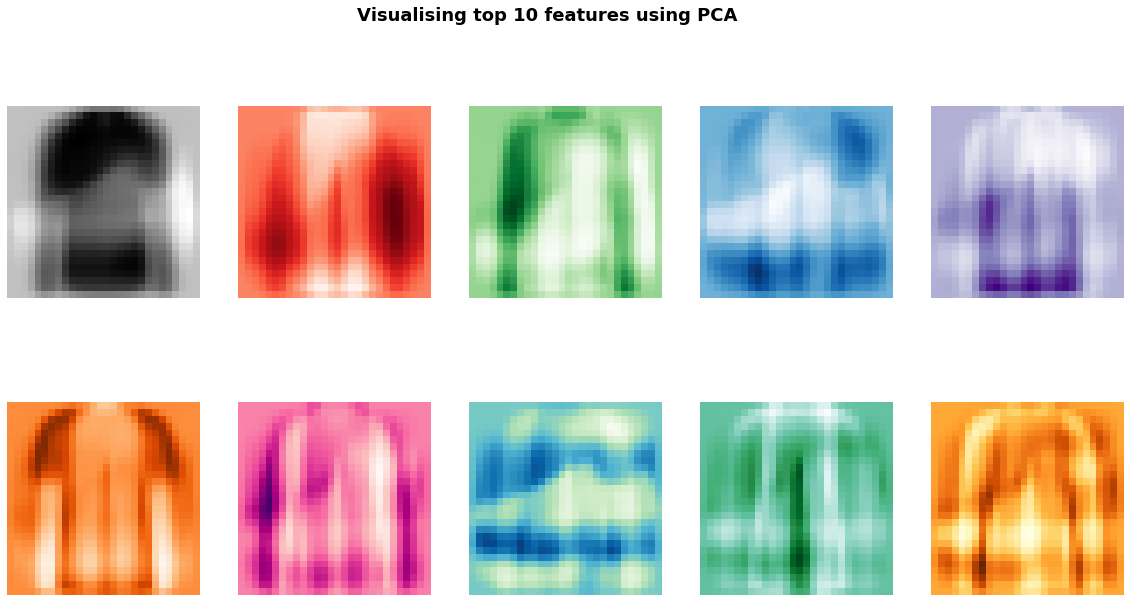

In [42]:
pca = PCA(n_components=10)
X_pca = pca.fit(X)
x_pca=pca.components_


#colour maps
colour_maps=['Greys','Reds','Greens','Blues','Purples','Oranges','RdPu','GnBu','BuGn','YlOrBr']

fig, axes = plt.subplots(2,5,figsize=(20,10))
plt.suptitle(('Visualising top 10 features using PCA'),
                 fontsize=18, fontweight='bold')
for i in range(10):
  if i<5:
    axes[0,i].imshow(x_pca[i].reshape(28,28),cmap=colour_maps[i])
    axes[0,i].axis('off')
   # axes[0,i].set_title((clothing_labels[i]),
   #              fontsize=14)

  else:
    axes[1,i-5].imshow(x_pca[i].reshape(28,28),cmap=colour_maps[i])
    axes[1,i-5].axis('off')
    #axes[1,i-5].set_title((clothing_labels[i]),
    #             fontsize=14)

As we can see we can't see singluar features very well but see a combinations of images.

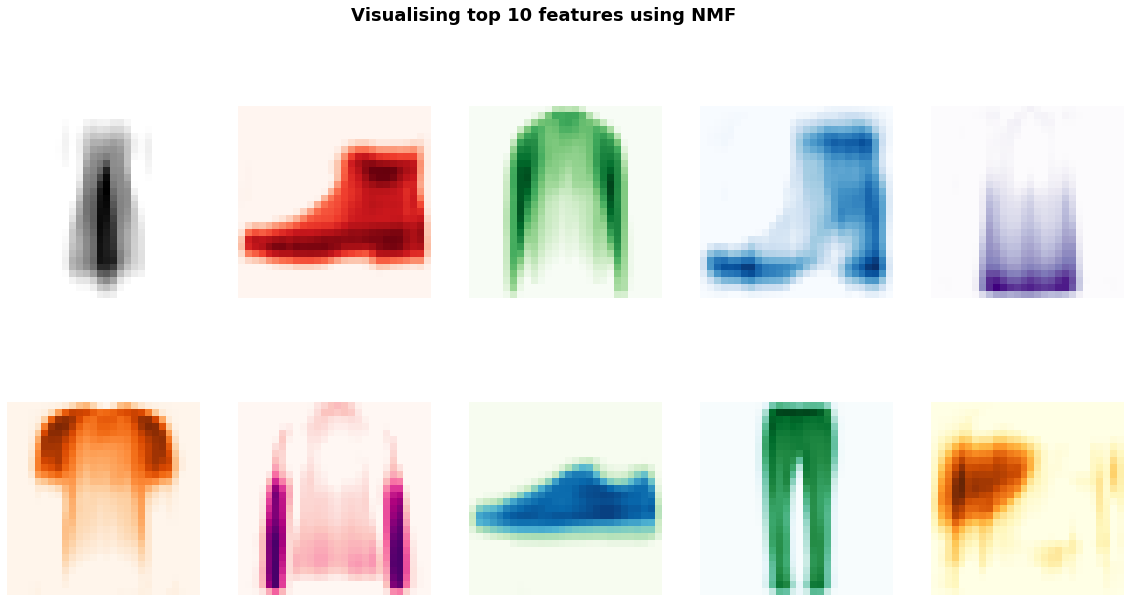

In [43]:
nmf = NMF(n_components=10)
nmf.fit(X)
x_nmf=nmf.components_


#colour maps
colour_maps=['Greys','Reds','Greens','Blues','Purples','Oranges','RdPu','GnBu','BuGn','YlOrBr']

fig, axes = plt.subplots(2,5,figsize=(20,10))
plt.suptitle(('Visualising top 10 features using NMF '),
                 fontsize=18, fontweight='bold')
for i in range(10):
  if i<5:
    axes[0,i].imshow(x_nmf[i].reshape(28,28),cmap=colour_maps[i])
    axes[0,i].axis('off')
   # axes[0,i].set_title((clothing_labels[i]),
   #              fontsize=14)

  else:
    axes[1,i-5].imshow(x_nmf[i].reshape(28,28),cmap=colour_maps[i])
    axes[1,i-5].axis('off')
    #axes[1,i-5].set_title((clothing_labels[i]),
    #             fontsize=14)




NMF seems to be giving very good results and clear features.

### Comparing NMF and PCA

As we see visually NMF seems far better at recognising the features with one images being ambigous, where as PCA is working beyond the human intuition in this scenario. The reason why PCA does perfrom very well as a result of the non-negative components can be stacked on top of negative compenents or vice versa. Resulting in the visual combining of dark and light images. Where as in NMF this is not a allowed to happen, due to only postive componets being combined, as part of the non negative factoration. 

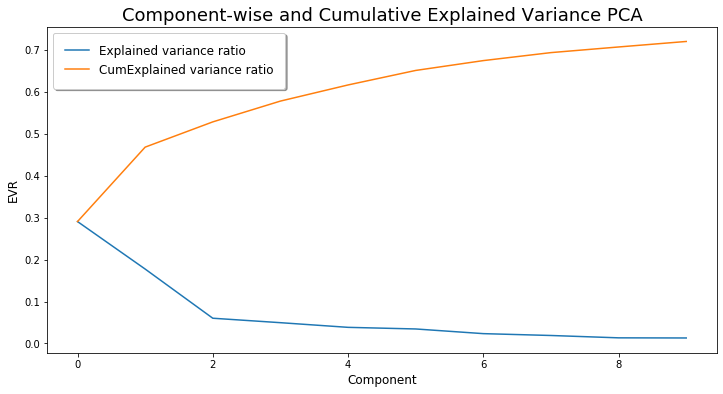

In [51]:
#make explained variance graph
plt.figure(figsize=(12, 6))

plt.xlabel('Component',size=12)
plt.ylabel('EVR',size=12)
plt.plot(range(10), pca.explained_variance_ratio_,label='Explained variance ratio')
plt.plot(range(10), np.cumsum(pca.explained_variance_ratio_),label='CumExplained variance ratio')
plt.title("Component-wise and Cumulative Explained Variance PCA",fontsize=18)
plt.legend(loc="upper left",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

This graph for PCA shows how beyond the first 2 components, you don't really gain anymore information, which is a byproduct of these conflict negative and postive features. If we could do this for NMF it would be a different result as generallly every component seems quite specific to a particular item. 

## 4.2 LDA applied to images

The following code fits LDA and shows the centroids.

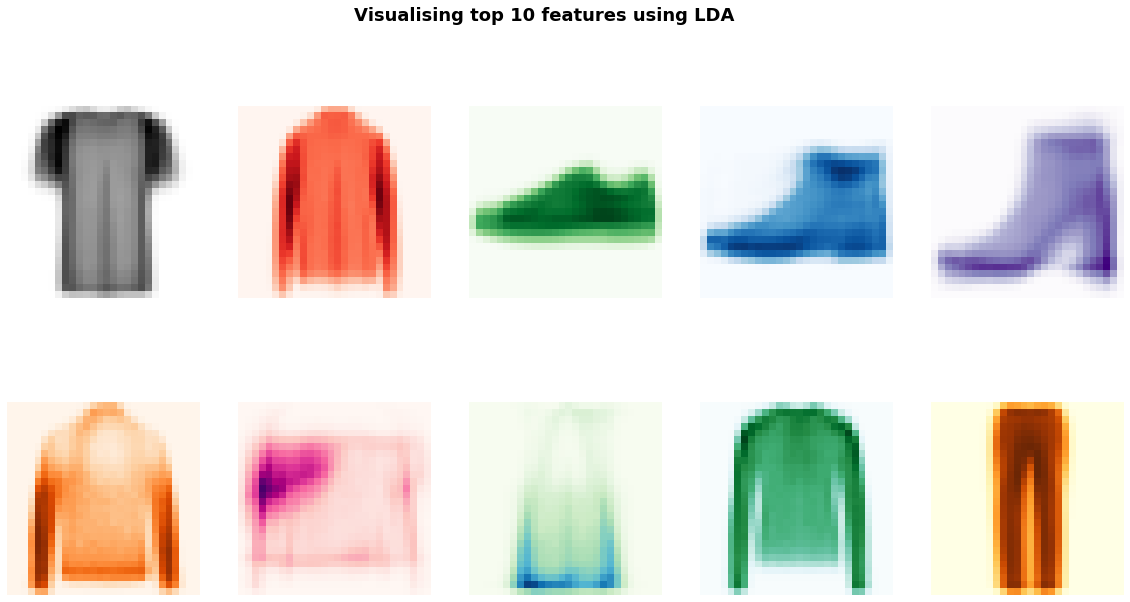

In [46]:
#lda = LatentDirichletAllocation(n_components=10)
#X_lda = lda.fit_transform(X)

lda = LatentDirichletAllocation(n_components=10)
lda.fit(X)
x_lda=lda.components_


#colour maps
colour_maps=['Greys','Reds','Greens','Blues','Purples','Oranges','RdPu','GnBu','BuGn','YlOrBr']

fig, axes = plt.subplots(2,5,figsize=(20,10))
plt.suptitle(('Visualising top 10 features using LDA '),
                 fontsize=18, fontweight='bold')
for i in range(10):
  if i<5:
    axes[0,i].imshow(x_lda[i].reshape(28,28),cmap=colour_maps[i])
    axes[0,i].axis('off')
   # axes[0,i].set_title((clothing_labels[i]),
   #              fontsize=14)

  else:
    axes[1,i-5].imshow(x_lda[i].reshape(28,28),cmap=colour_maps[i])
    axes[1,i-5].axis('off')
    #axes[1,i-5].set_title((clothing_labels[i]),
    #             fontsize=14)


It took a fairly long time to run, however it produces fairly good results. This is little surprising as it has limited use for image classifications, in similar way to K-means. So in an unsupervised sense it will perform reasonably well, but it will struggle to compete with any surpvised technique e.g neural net and is limited acccording to the data. It turns out it is not the very well suited for image classification, it is good for extracting features and assigning topics in text documents. 

It performs to the same if not better level of K-means and NMF. If you look at the images they look the most clear of all the methods and have the least ambiguos items, followed by K-means, then NMF and finally PCA (according to features anyway). This is surprising as you would expect NMF to probably produce the best results since it is designed for images, but this is very hard to actually compare due to the different metrics.